# Assignment Set 3

*Authors*: Myriam Belkhatir, Salomé Poulain, Shania Sinha

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.sparse import diags

from importlib import reload

## **3.1**: Eigenmodes of Different Drum Shapes

### **A**: Discretization of the Laplacian

This question is mostly theoretical and does not require any code. However, a visual representation of the matrix is created in the code below.

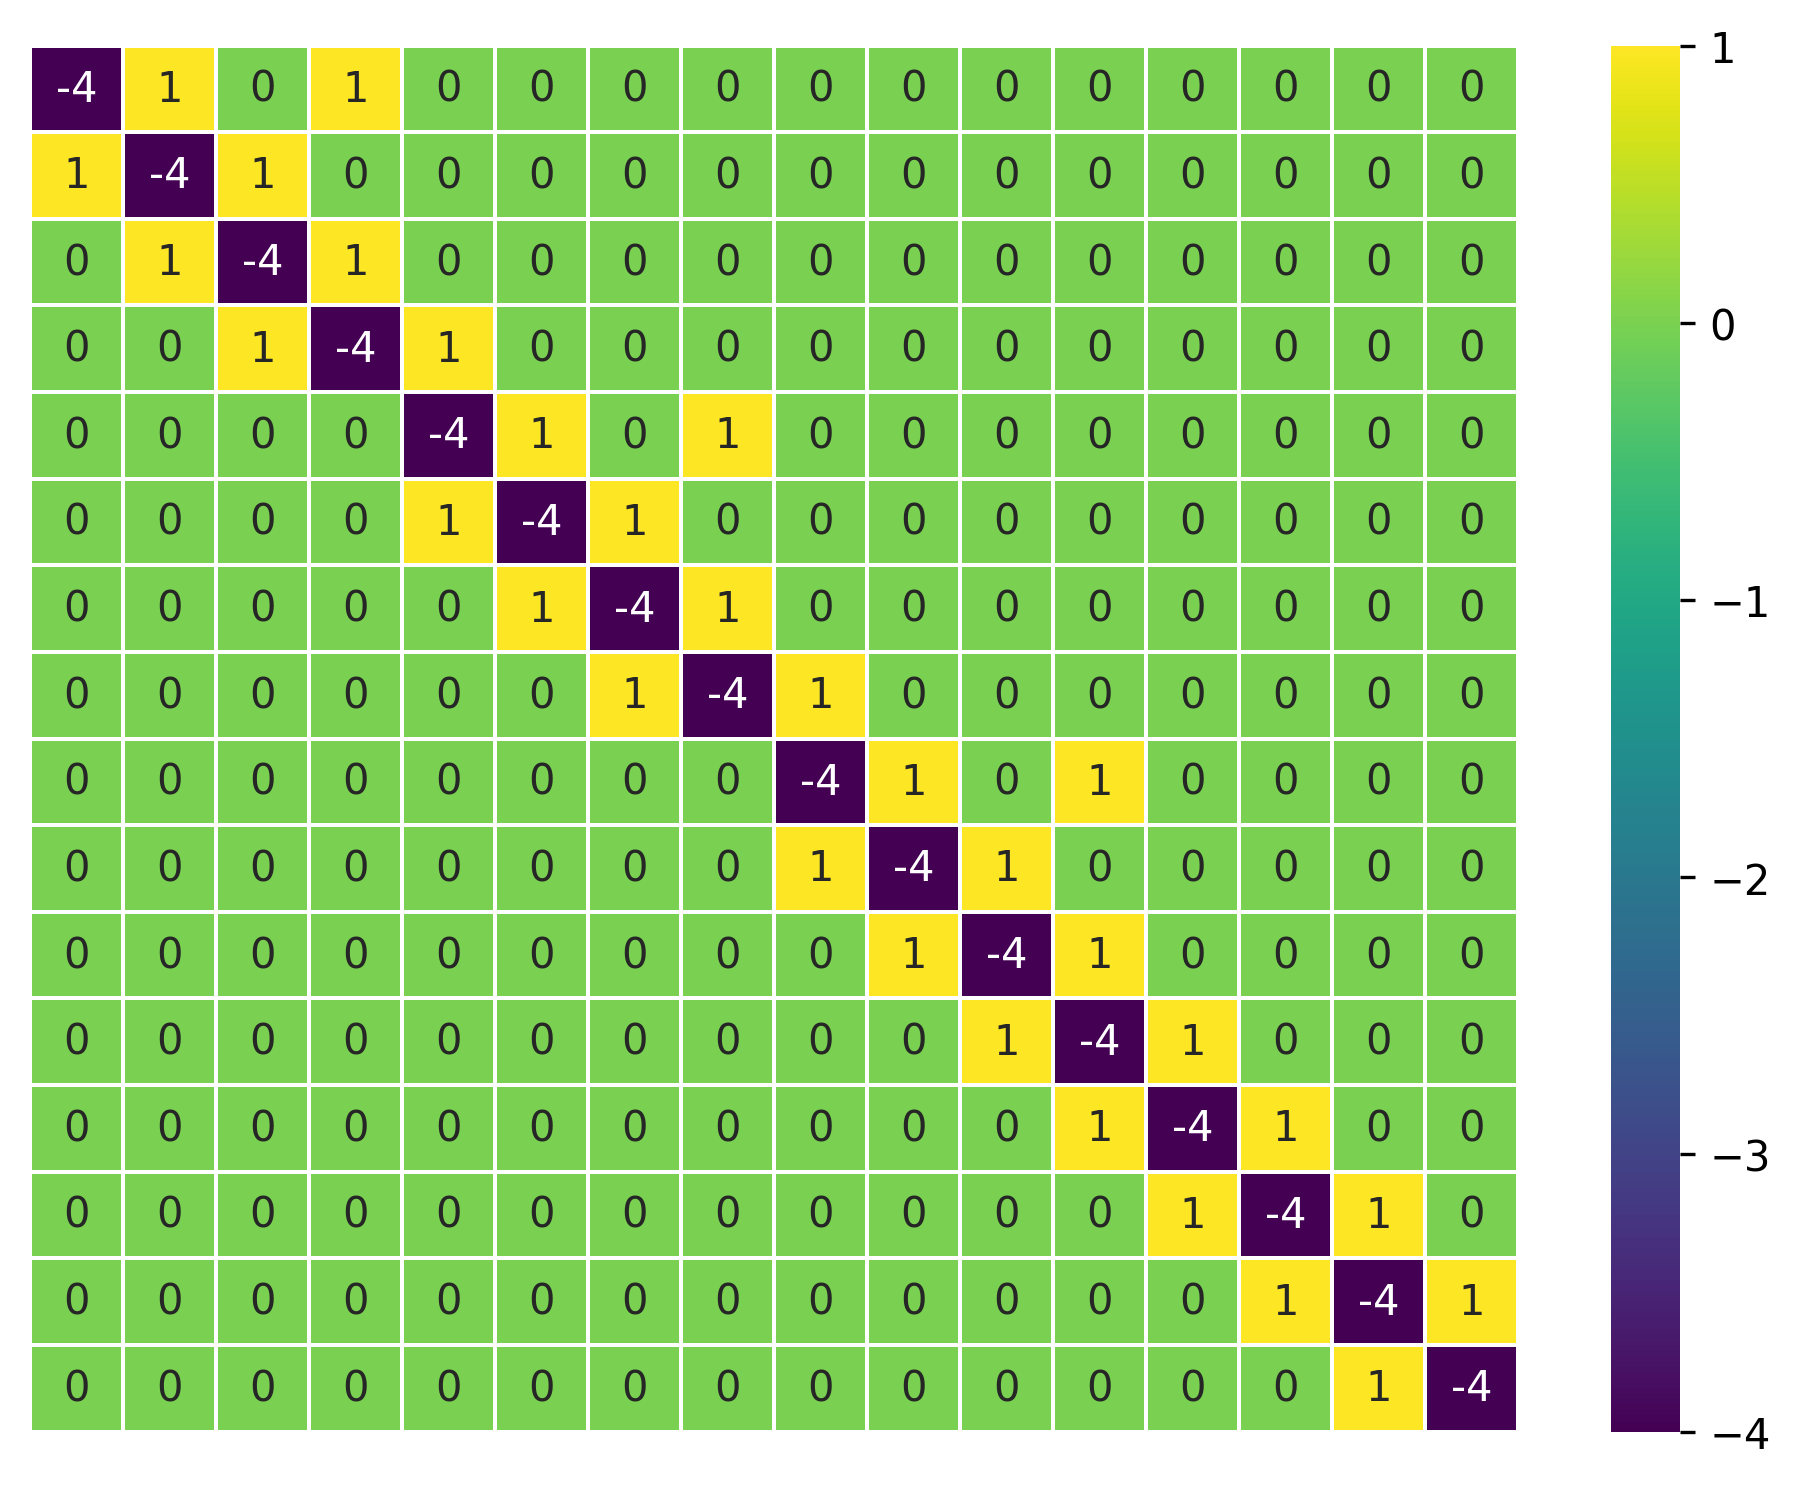

In [18]:
import src.matrix_form_plot
reload(src.matrix_form_plot)
from src.matrix_form_plot import plot_matrix_form

# Discretization of the domain (matrix visualization)
plot_matrix_form()

### **B**: Eigenmodes of Differently-shaped Drums

In [19]:
import src.eigenmodes
# reload(src.eigenmodes)
from src.eigenmodes import EigenvalueProblem

In [20]:
# Define global parameters
shape_dims_tuple = [
        ('square', [1]),
        ('rectangle', [1, 2]),
        ('circle', [1])
    ]

used_solver = 'eig' # Choice explained in methodology of report
n = 30

#### **B.1**: Square with Side = L
#### **B.2**: Rectangle with Sides = L, 2L
#### **B.3**: Circle with Diameter = L


Solving for shape: Square, Dimensions: [1]
Using solver: eig
Solver: eig, Time taken: 0.3553 s, First eigenvalue: 19.7223+0.0000j


c:\Users\Saloc\iCloudDrive\Documents\computational_science\scientiffic_computing\sc-set3\src\eigenmodes.py:182: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])


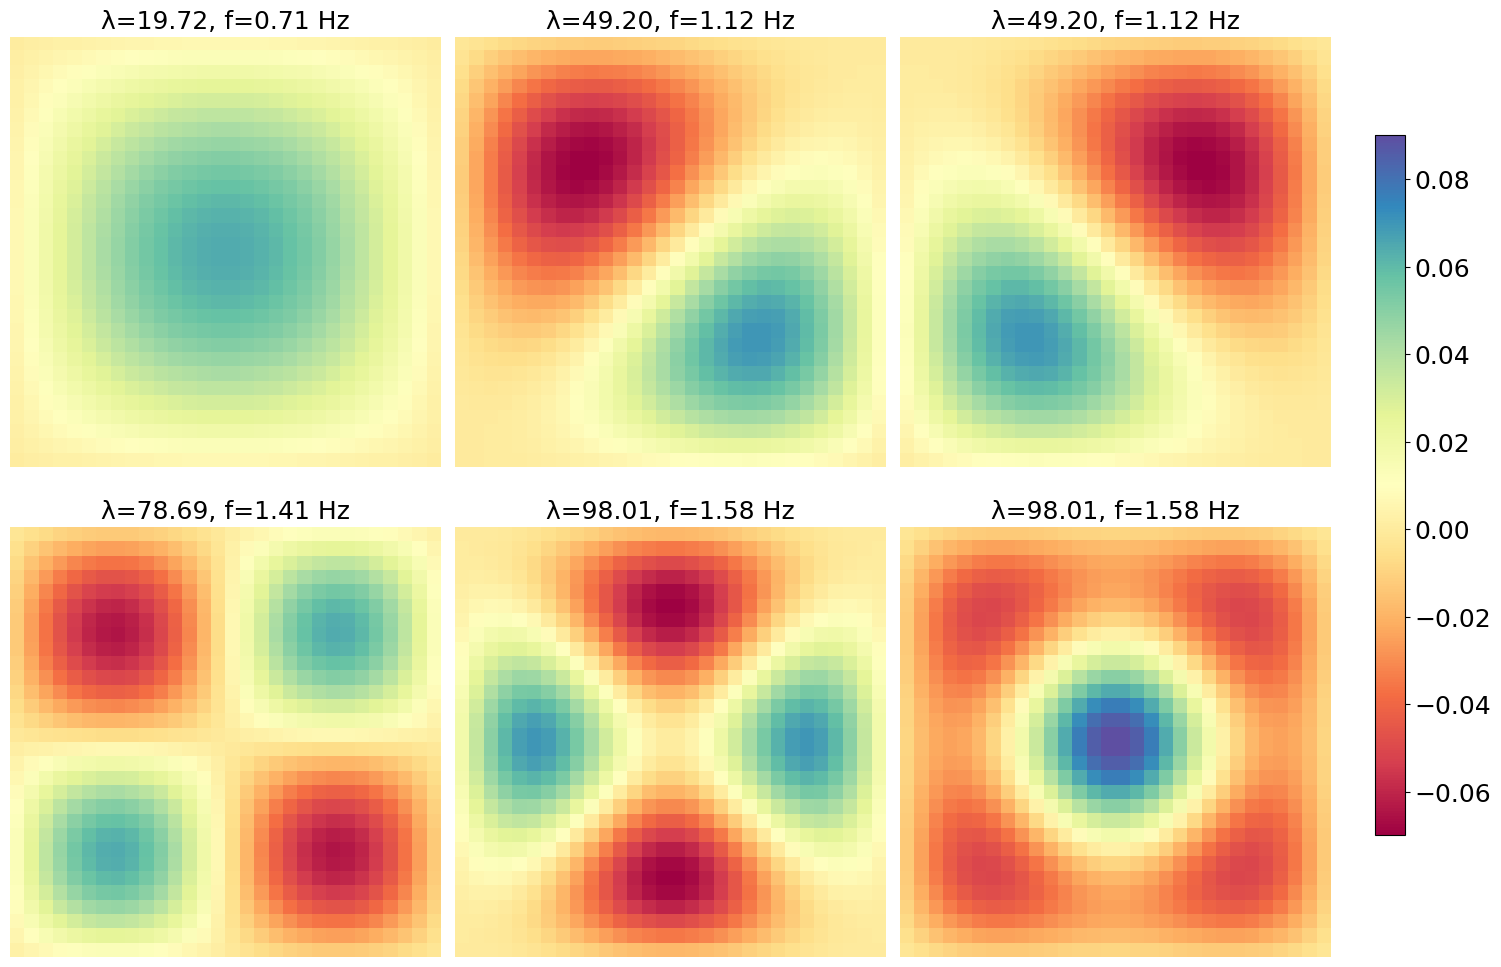

Using solver: eigs
Solver: eigs, Time taken: 0.0110 s, First eigenvalue: 19.7223+0.0000j


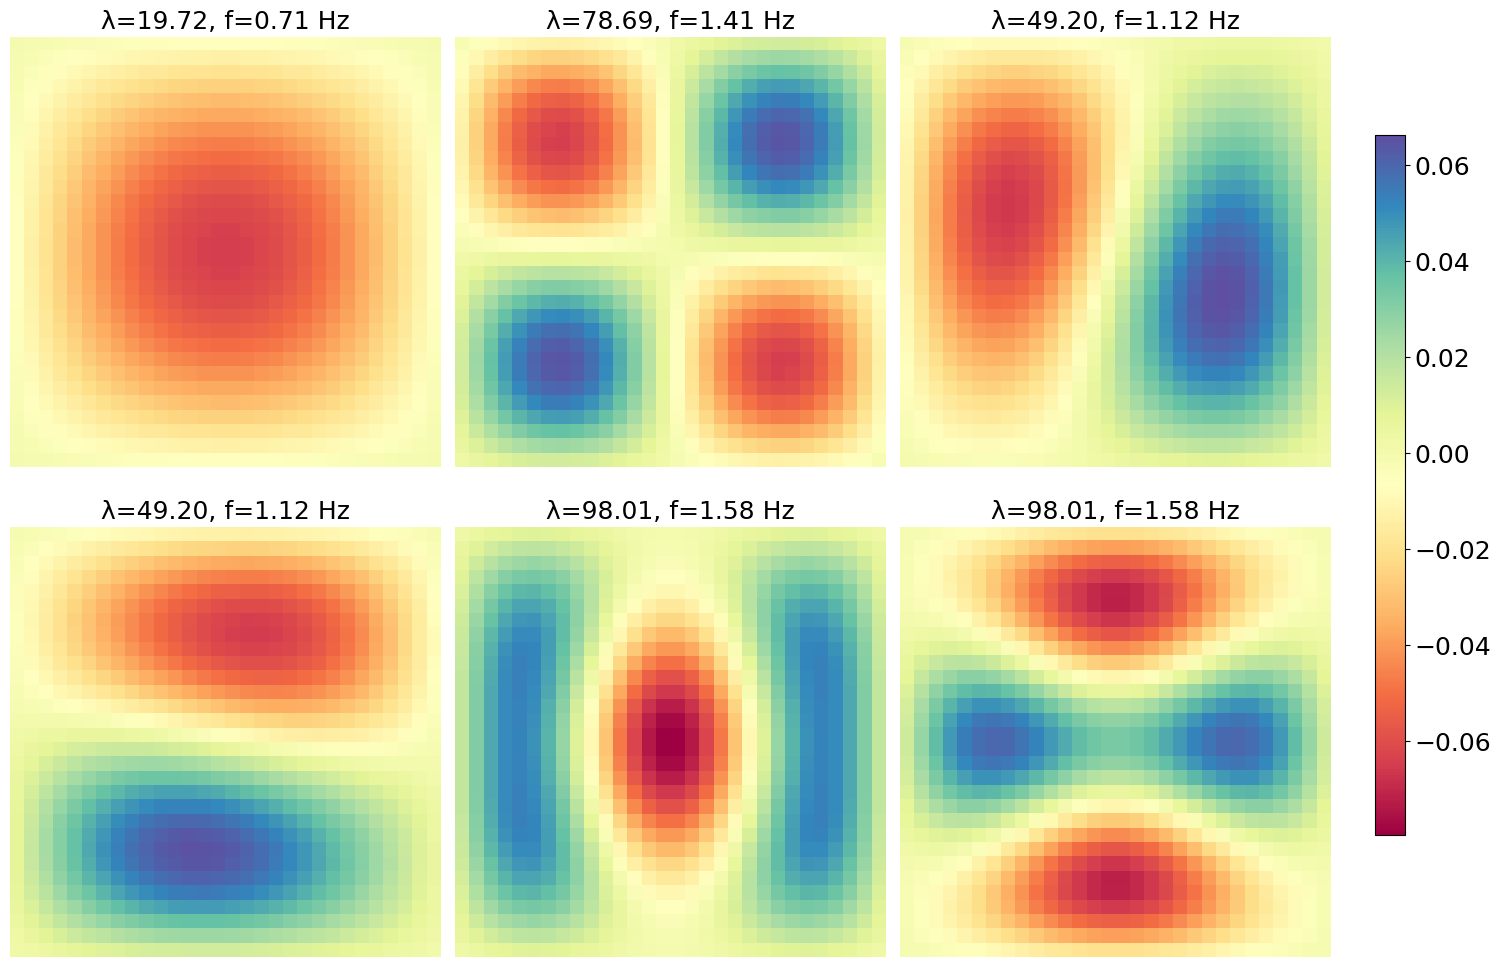

Using solver: eigh
Solver: eigh, Time taken: 0.2567 s, First eigenvalue: 19.7223


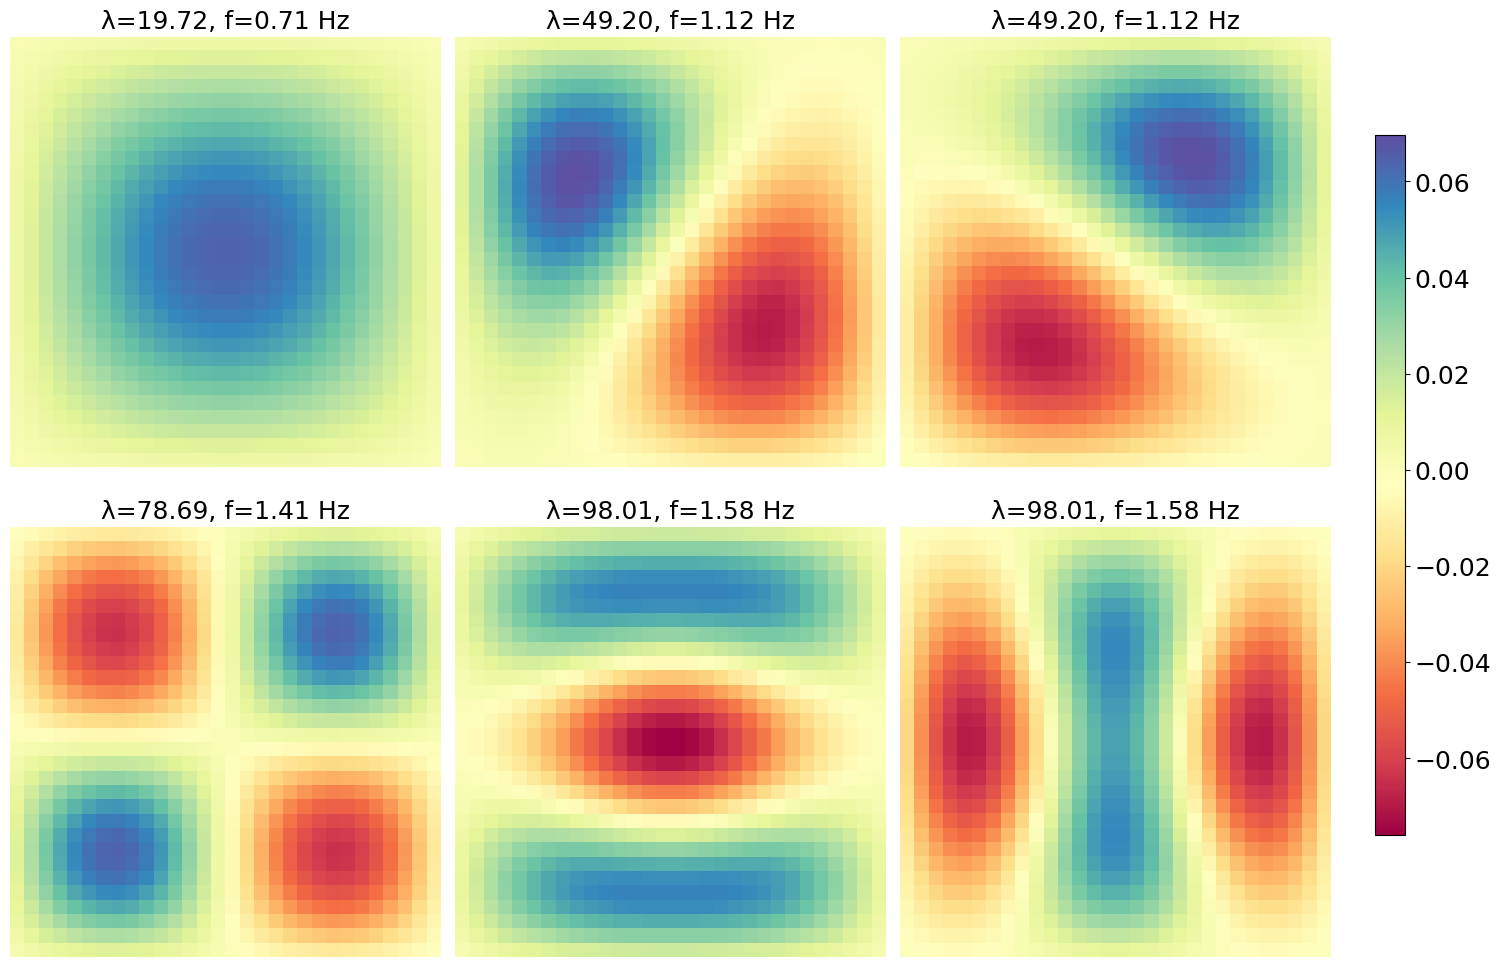

Using solver: eigsh
Solver: eigsh, Time taken: 0.0140 s, First eigenvalue: 19.7223


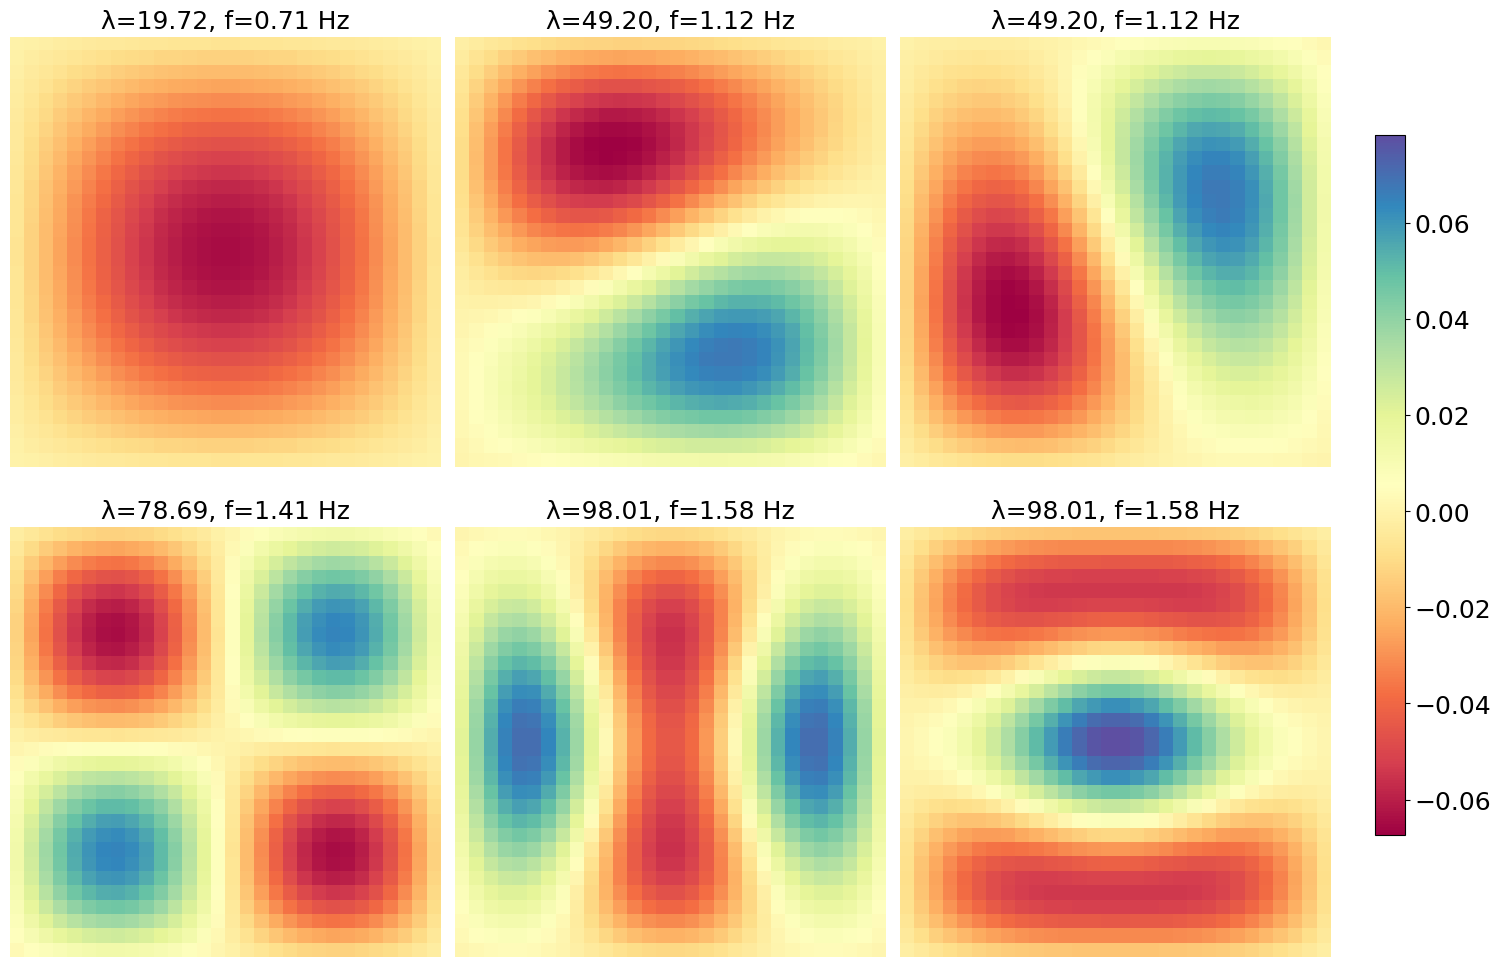


Solving for shape: Rectangle, Dimensions: [1, 2]
Using solver: eig
Solver: eig, Time taken: 0.4029 s, First eigenvalue: 12.3265+0.0000j


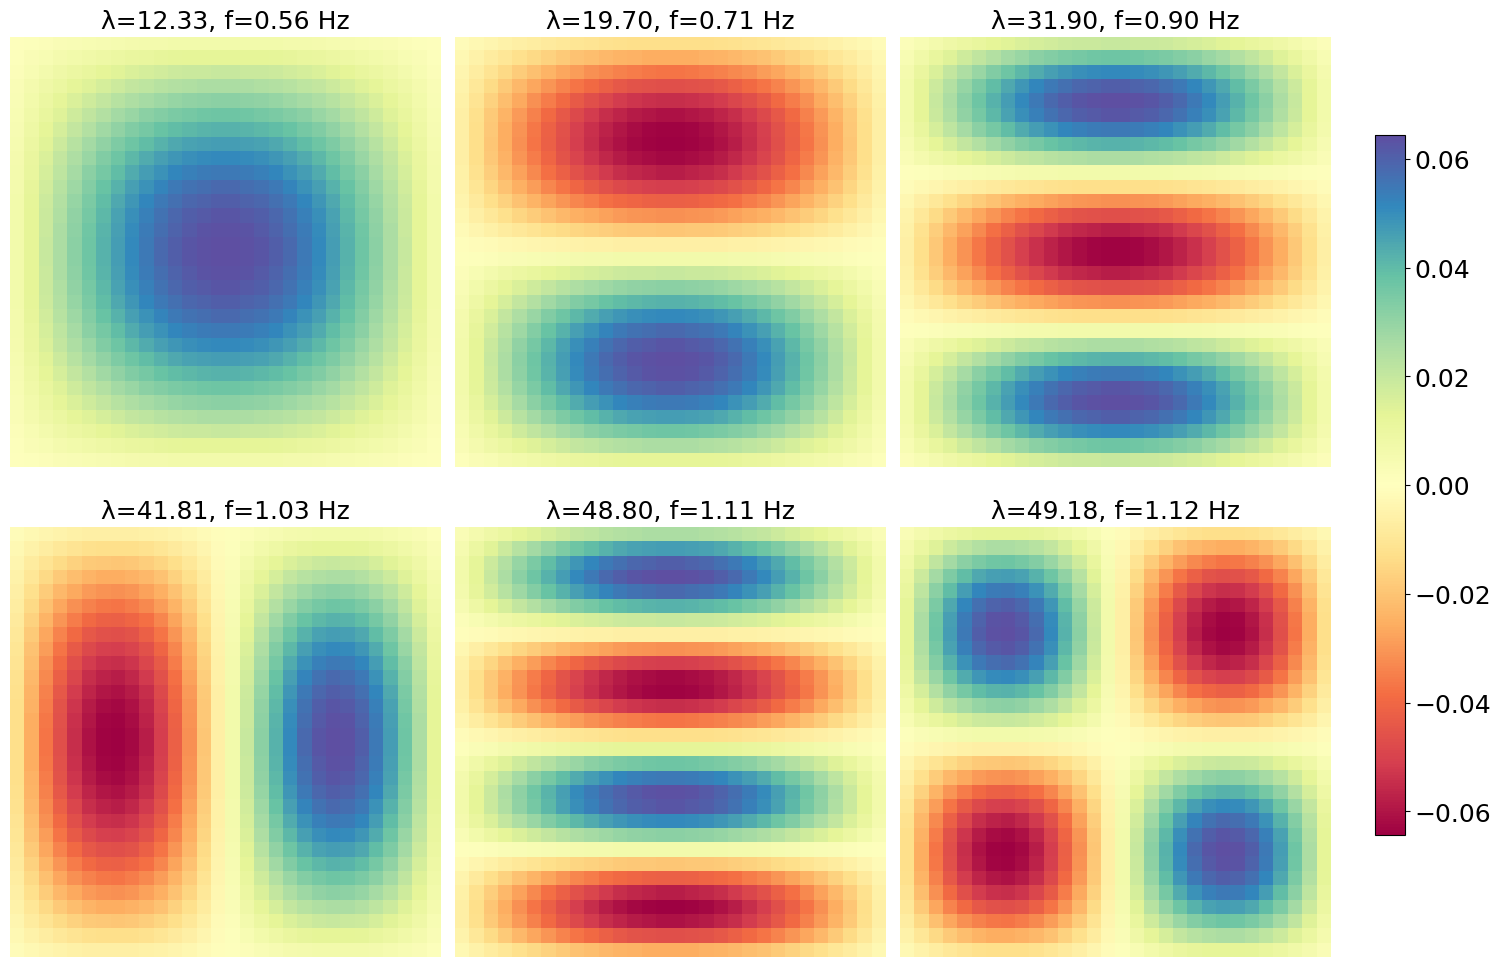

Using solver: eigs
Solver: eigs, Time taken: 0.0095 s, First eigenvalue: 12.3265+0.0000j


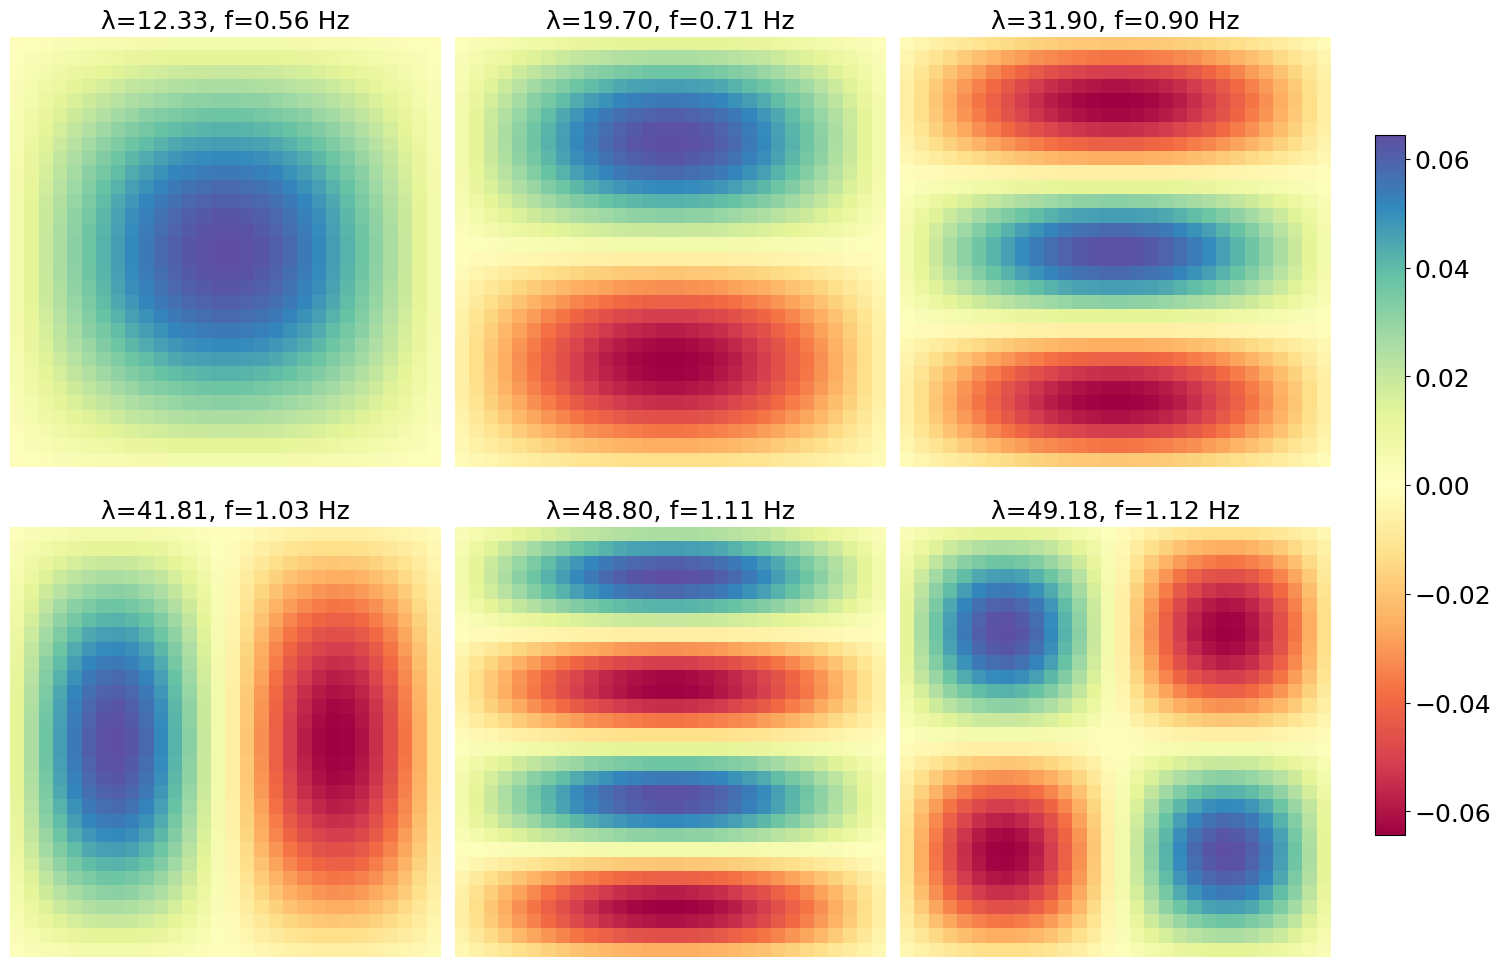

Using solver: eigh
Solver: eigh, Time taken: 0.1655 s, First eigenvalue: 12.3265


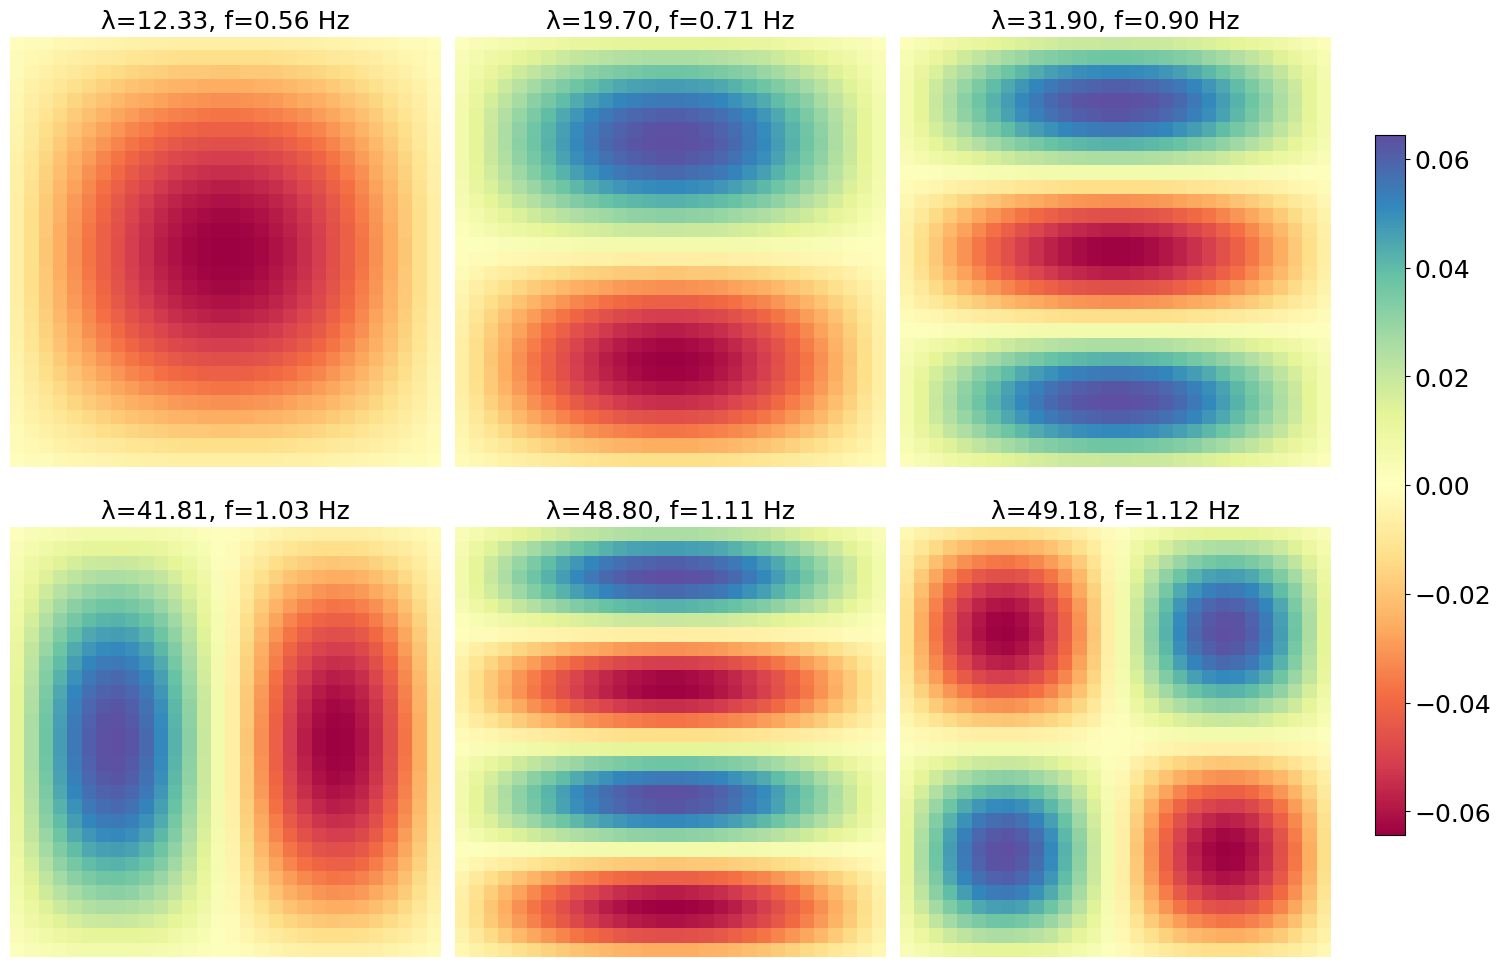

Using solver: eigsh
Solver: eigsh, Time taken: 0.0090 s, First eigenvalue: 12.3265


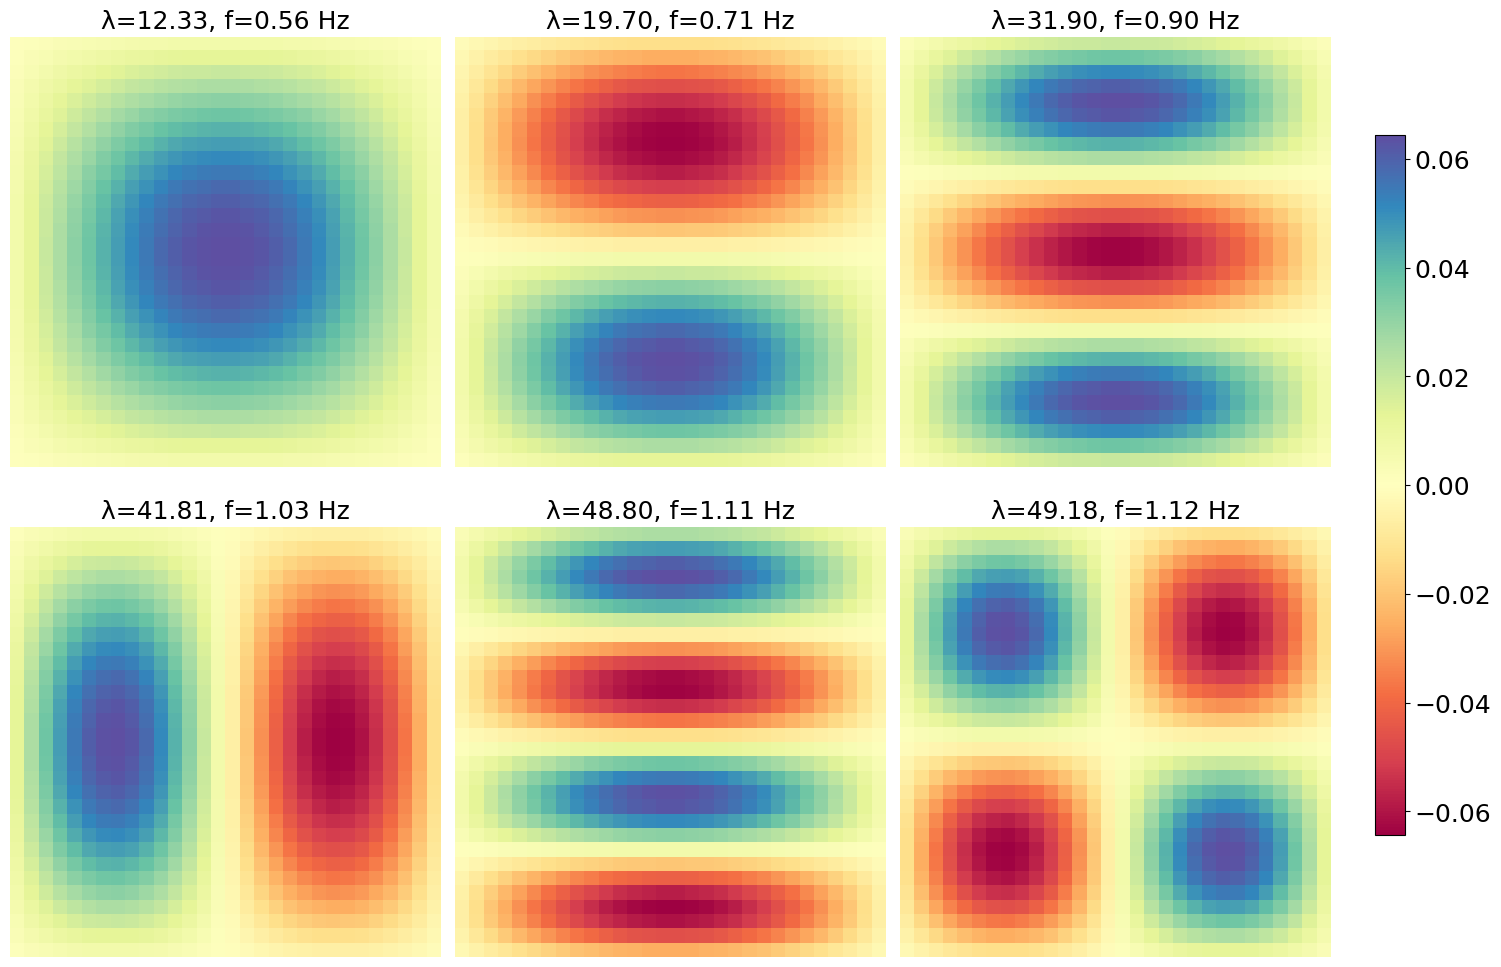


Solving for shape: Circle, Dimensions: [1]
Using solver: eig


c:\Users\Saloc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Solver: eig, Time taken: 0.2112 s, First eigenvalue: 25.5102+0.0000j


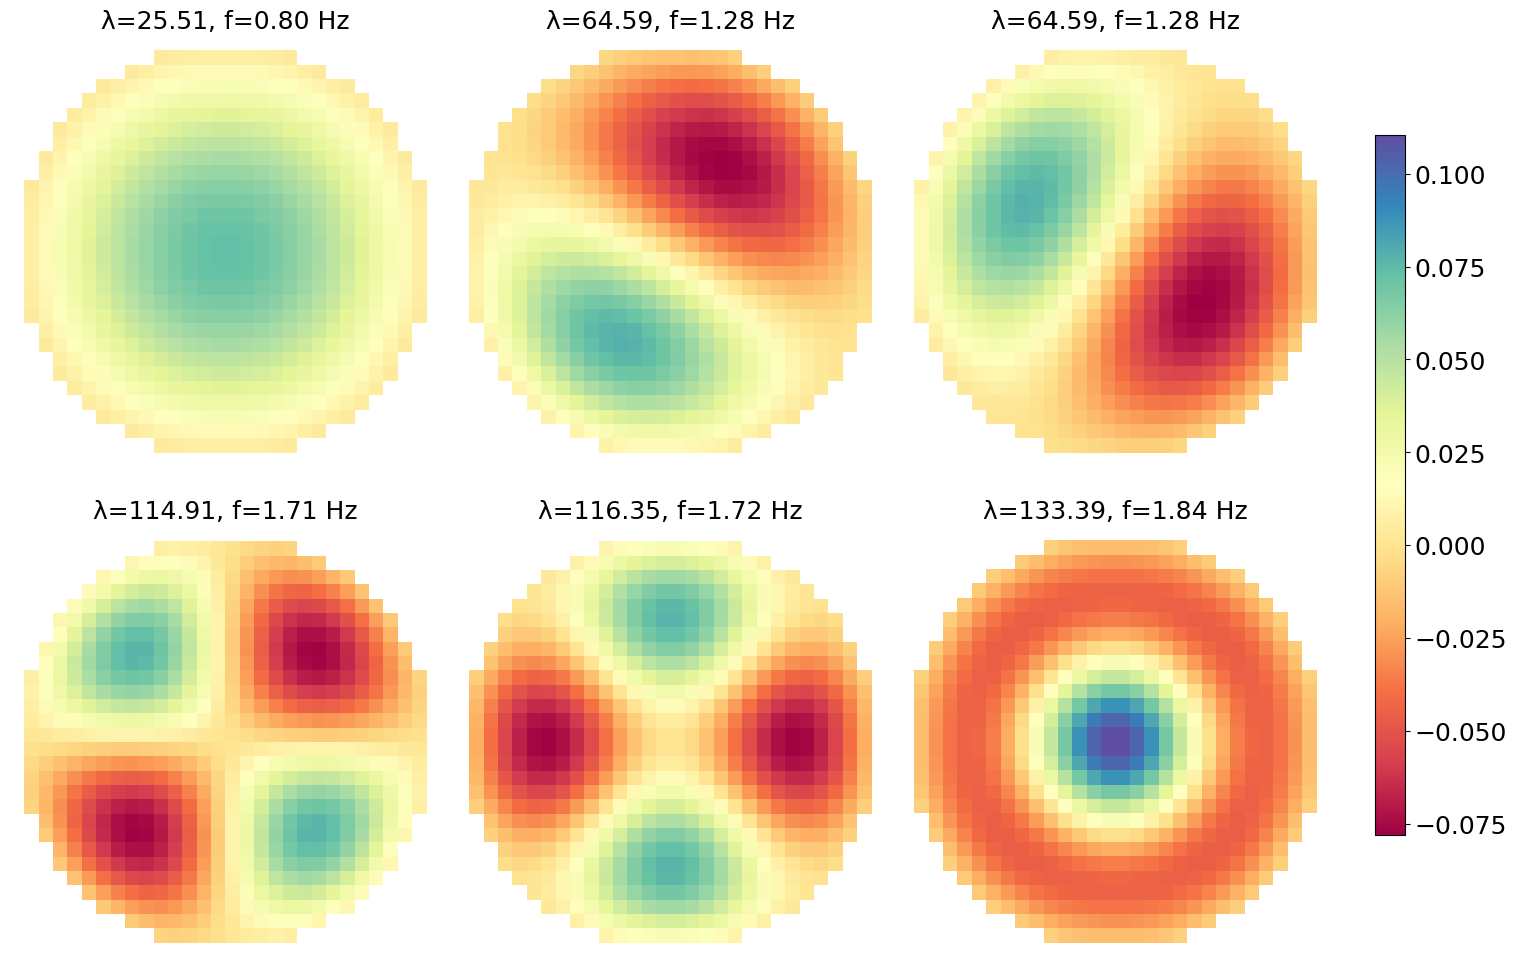

Using solver: eigs
Solver: eigs, Time taken: 0.0980 s, First eigenvalue: 25.5102+0.0000j


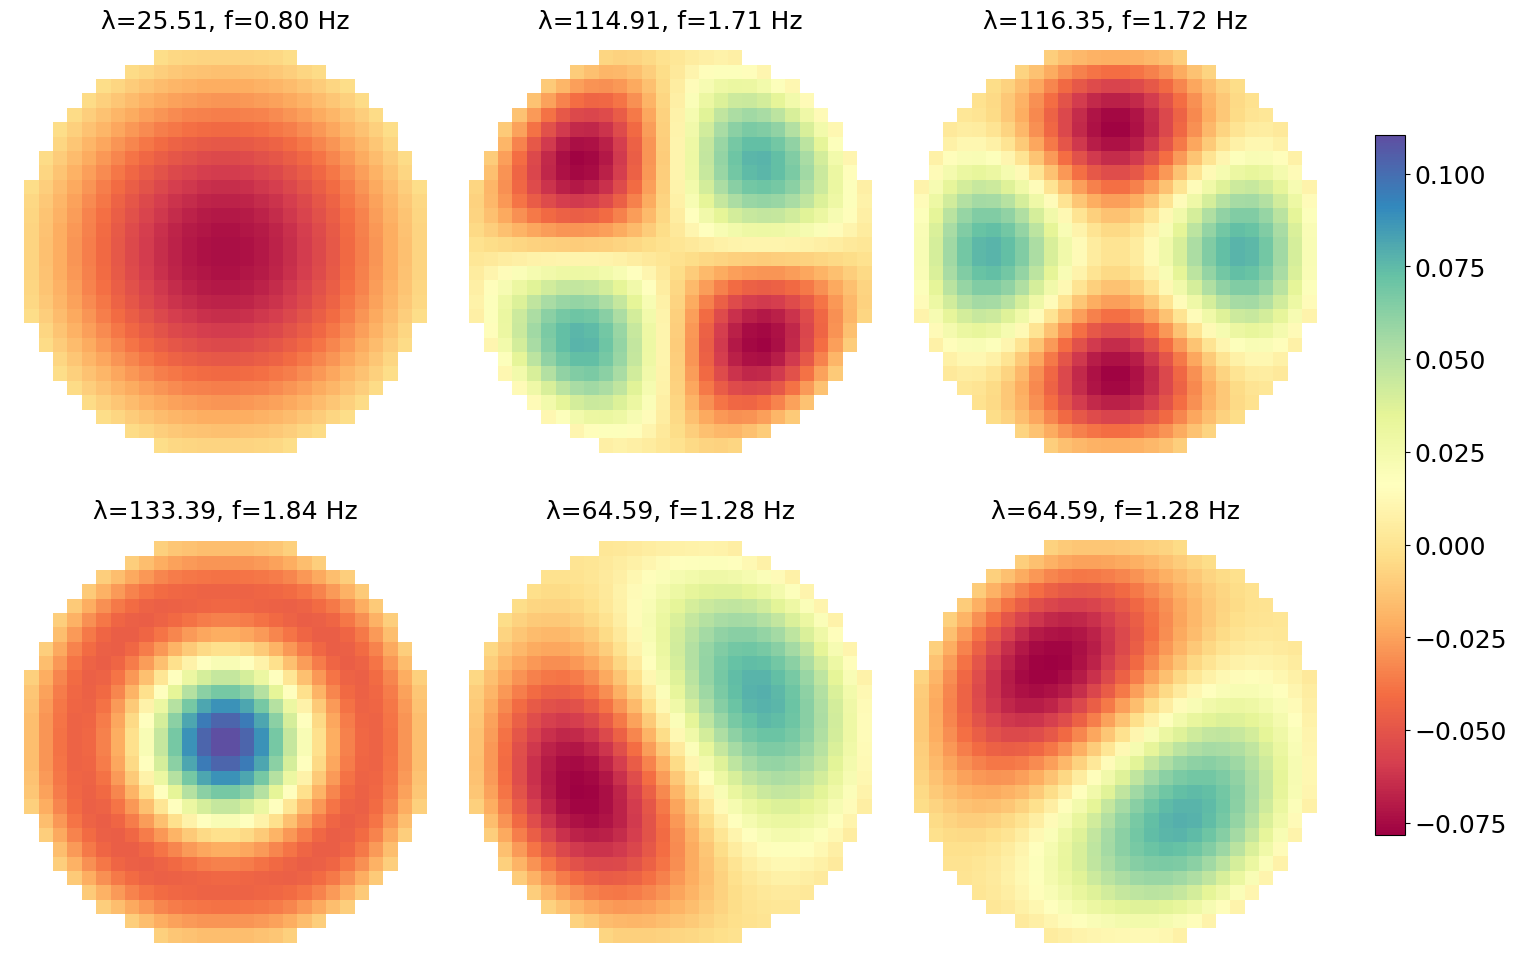

Using solver: eigh
Solver: eigh, Time taken: 0.2813 s, First eigenvalue: -236.1195


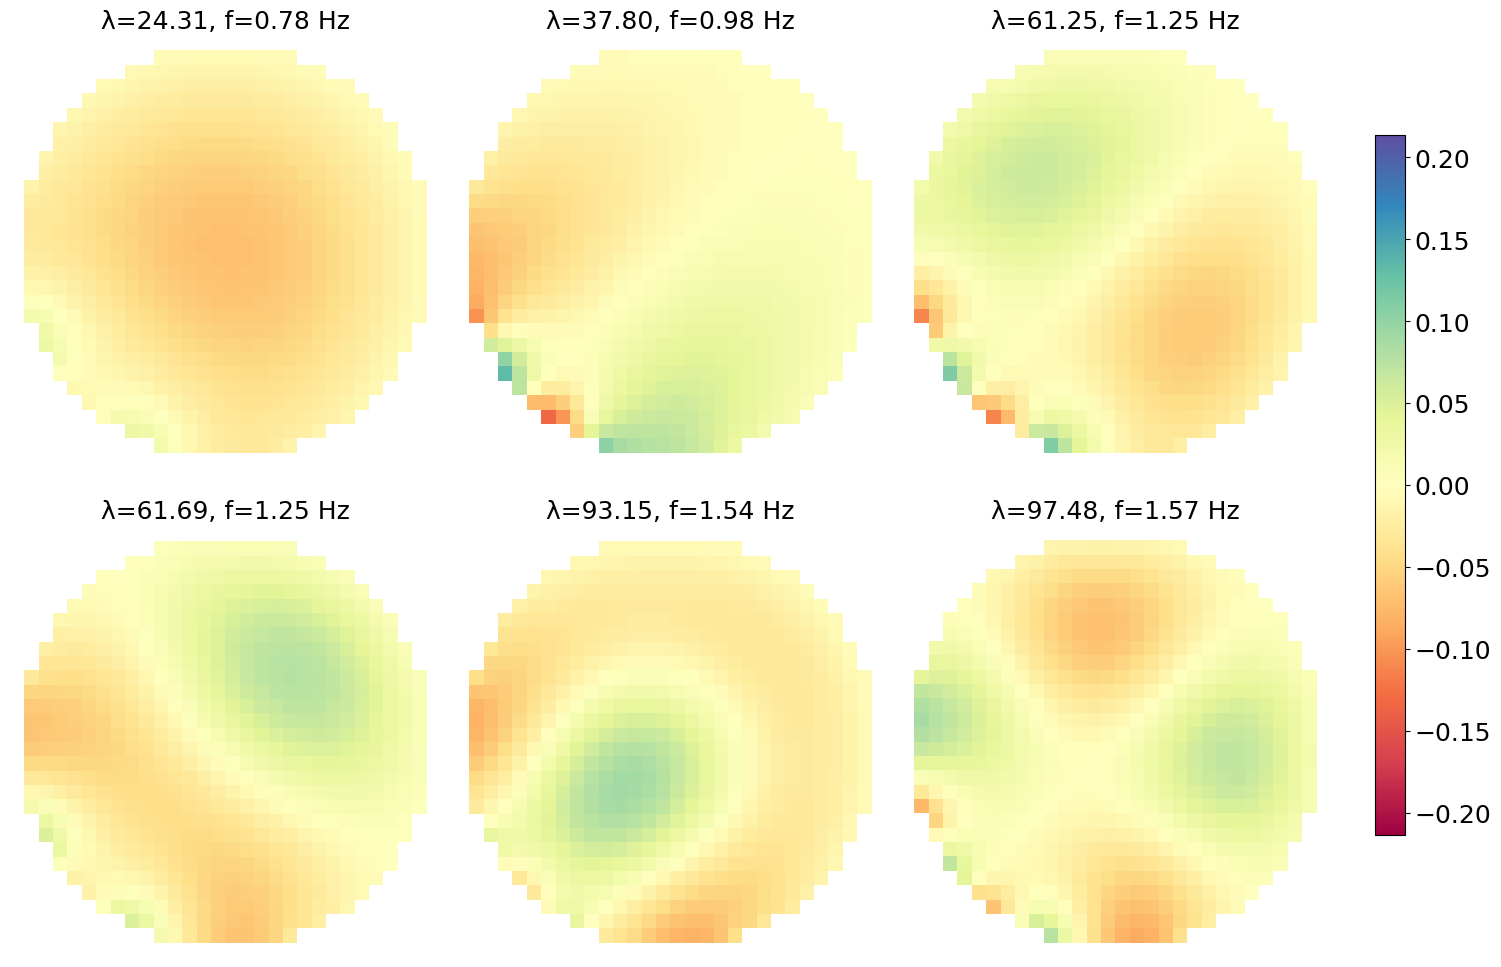

Using solver: eigsh
Solver: eigsh, Time taken: 0.0960 s, First eigenvalue: 25.7983


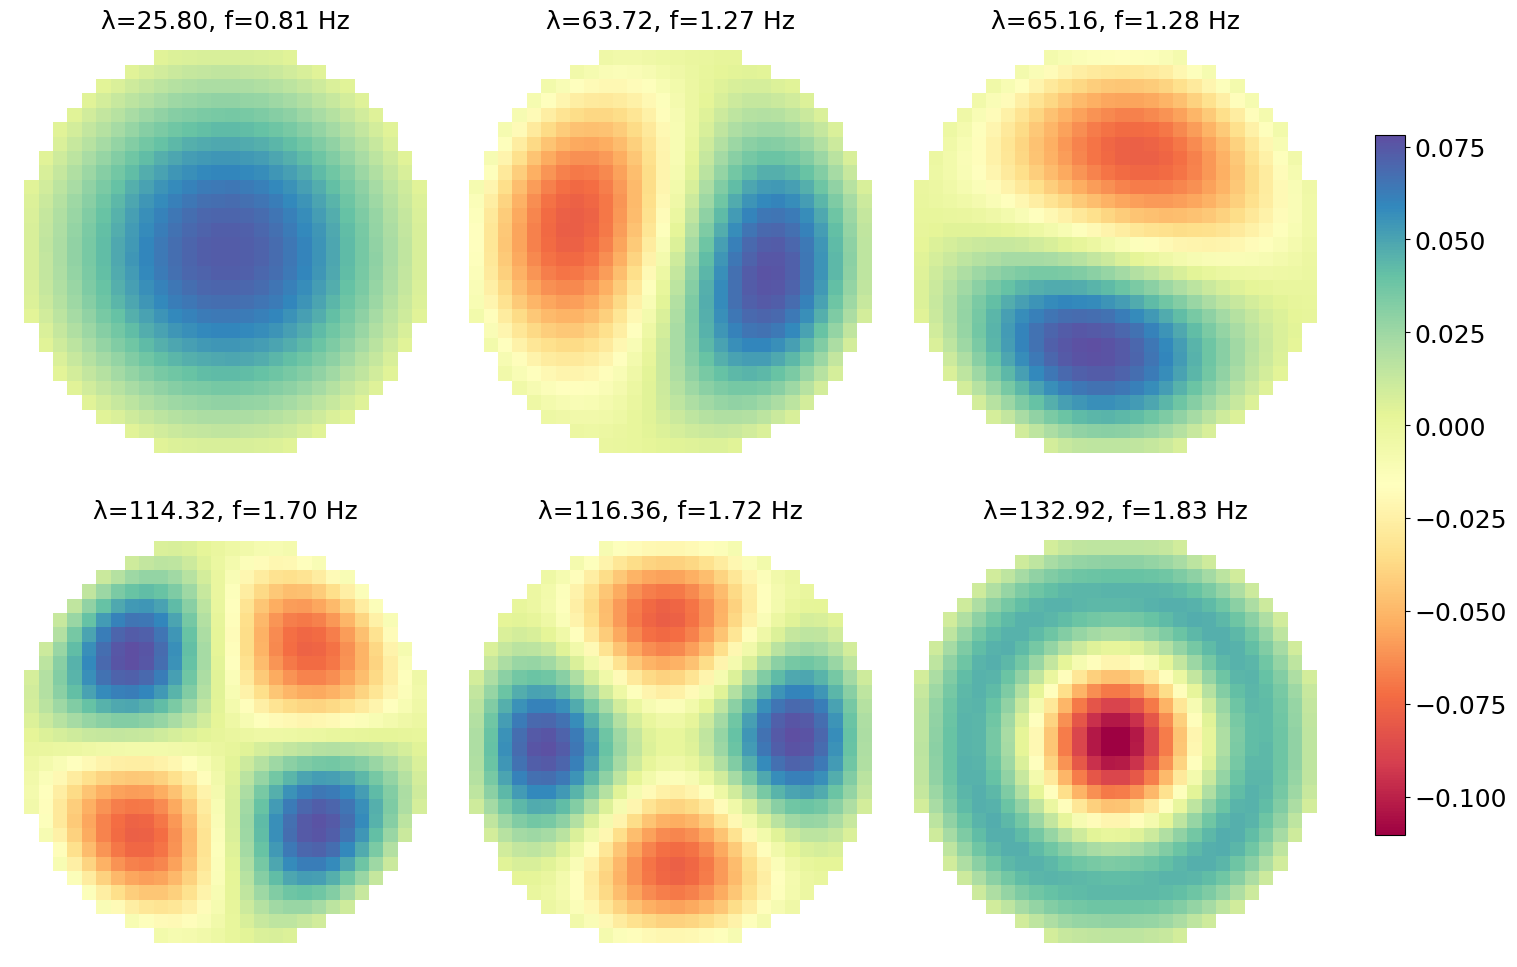

In [21]:
results = {}
solvers = ['eig', 'eigs', 'eigh', 'eigsh']
# Solve eigenvalue problems and plot eigenmodes
for shape, dims in shape_dims_tuple:
    print(f"\nSolving for shape: {shape.capitalize()}, Dimensions: {dims}")

    problem = EigenvalueProblem(shape, dims, n=n)

    for solver in solvers:
        print(f"Using solver: {solver}")
        eigenvals, eigenvecs, elapsed = problem.solve_eigen_problem(solver=solver, k=9)

        # Store results
        key = f"{shape}_{solver}"
        results[key] = {
            'eigenvalues': eigenvals,
            'eigenvectors': eigenvecs,
            'time': elapsed
        }

        problem.plot_eigenvectors(num_modes=6)

#### **C**: Speed comparison

In [22]:
# Performance comparison (Dense vs Sparse)
print("\nSolver Performance Comparison:")
for shape, _ in shape_dims_tuple:
    dense_time = results[f"{shape}_eig"]['time']
    sparse_time = results[f"{shape}_eigs"]['time']
    speedup = dense_time / sparse_time
    print(f"{shape.capitalize()}: Dense={dense_time:.4f}s, Sparse={sparse_time:.4f}s, Speedup={speedup:.1f}x")


for shape, _ in shape_dims_tuple:
    dense_time = results[f"{shape}_eigh"]['time']
    sparse_time = results[f"{shape}_eigsh"]['time']
    speedup = dense_time / sparse_time
    print(f"{shape.capitalize()}: Dense={dense_time:.4f}s, Sparse={sparse_time:.4f}s, Speedup={speedup:.1f}x")


Solver Performance Comparison:
Square: Dense=0.3553s, Sparse=0.0110s, Speedup=32.3x
Rectangle: Dense=0.4029s, Sparse=0.0095s, Speedup=42.4x
Circle: Dense=0.2112s, Sparse=0.0980s, Speedup=2.2x
Square: Dense=0.2567s, Sparse=0.0140s, Speedup=18.3x
Rectangle: Dense=0.1655s, Sparse=0.0090s, Speedup=18.4x
Circle: Dense=0.2813s, Sparse=0.0960s, Speedup=2.9x


#### **D**: Frequency dependence

In [23]:
# Because eig is used as a solver for more precise results, this might take some time to run but < 10 minutes
n_values = [15, 30, 60]
L_values = np.linspace(0.5, 20.0, 10)
fundamental_freqs = {n: {'square': [], 'rectangle': [], 'circle': []} for n in n_values}

In [24]:
for n in n_values:
    print(f"\nSolving for n = {n}")

    for L in L_values:
        print(f"Domain size L = {L:.2f}")

        # Square
        sq_prob = EigenvalueProblem('square', [L], n=n)
        eig_sq, _, _ = sq_prob.solve_eigen_problem(solver=used_solver)
        freq_sq = np.sqrt(eig_sq[0]) / (2*np.pi)
        fundamental_freqs[n]['square'].append(freq_sq)

        # Rectangle (2L x L)
        rect_prob = EigenvalueProblem('rectangle', [L, 2*L], n=n)
        eig_rect, _, _ = rect_prob.solve_eigen_problem(solver=used_solver)
        freq_rect = np.sqrt(eig_rect[0]) / (2*np.pi)
        fundamental_freqs[n]['rectangle'].append(freq_rect)

        # Circle (diameter L)
        circ_prob = EigenvalueProblem('circle', [L], n=n)
        eig_circ, _, _ = circ_prob.solve_eigen_problem(solver=used_solver)
        freq_circ = np.sqrt(eig_circ[0]) / (2*np.pi)
        fundamental_freqs[n]['circle'].append(freq_circ)


Solving for n = 15
Domain size L = 0.50
Solver: eig, Time taken: 0.0315 s, First eigenvalue: 78.7035+0.0000j
Solver: eig, Time taken: 0.0360 s, First eigenvalue: 49.1897+0.0000j
Solver: eig, Time taken: 0.0215 s, First eigenvalue: 112.4592+0.0000j
Domain size L = 2.67
Solver: eig, Time taken: 0.0325 s, First eigenvalue: 2.7669+0.0000j
Solver: eig, Time taken: 0.0340 s, First eigenvalue: 1.7293+0.0000j
Solver: eig, Time taken: 0.0210 s, First eigenvalue: 3.9536+0.0000j
Domain size L = 4.83
Solver: eig, Time taken: 0.0305 s, First eigenvalue: 0.8422+0.0000j
Solver: eig, Time taken: 0.0340 s, First eigenvalue: 0.5264+0.0000j
Solver: eig, Time taken: 0.0211 s, First eigenvalue: 1.2035+0.0000j
Domain size L = 7.00
Solver: eig, Time taken: 0.0315 s, First eigenvalue: 0.4015+0.0000j
Solver: eig, Time taken: 0.0349 s, First eigenvalue: 0.2510+0.0000j
Solver: eig, Time taken: 0.0207 s, First eigenvalue: 0.5738+0.0000j
Domain size L = 9.17
Solver: eig, Time taken: 0.0314 s, First eigenvalue: 0.

c:\Users\Saloc\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\Saloc\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


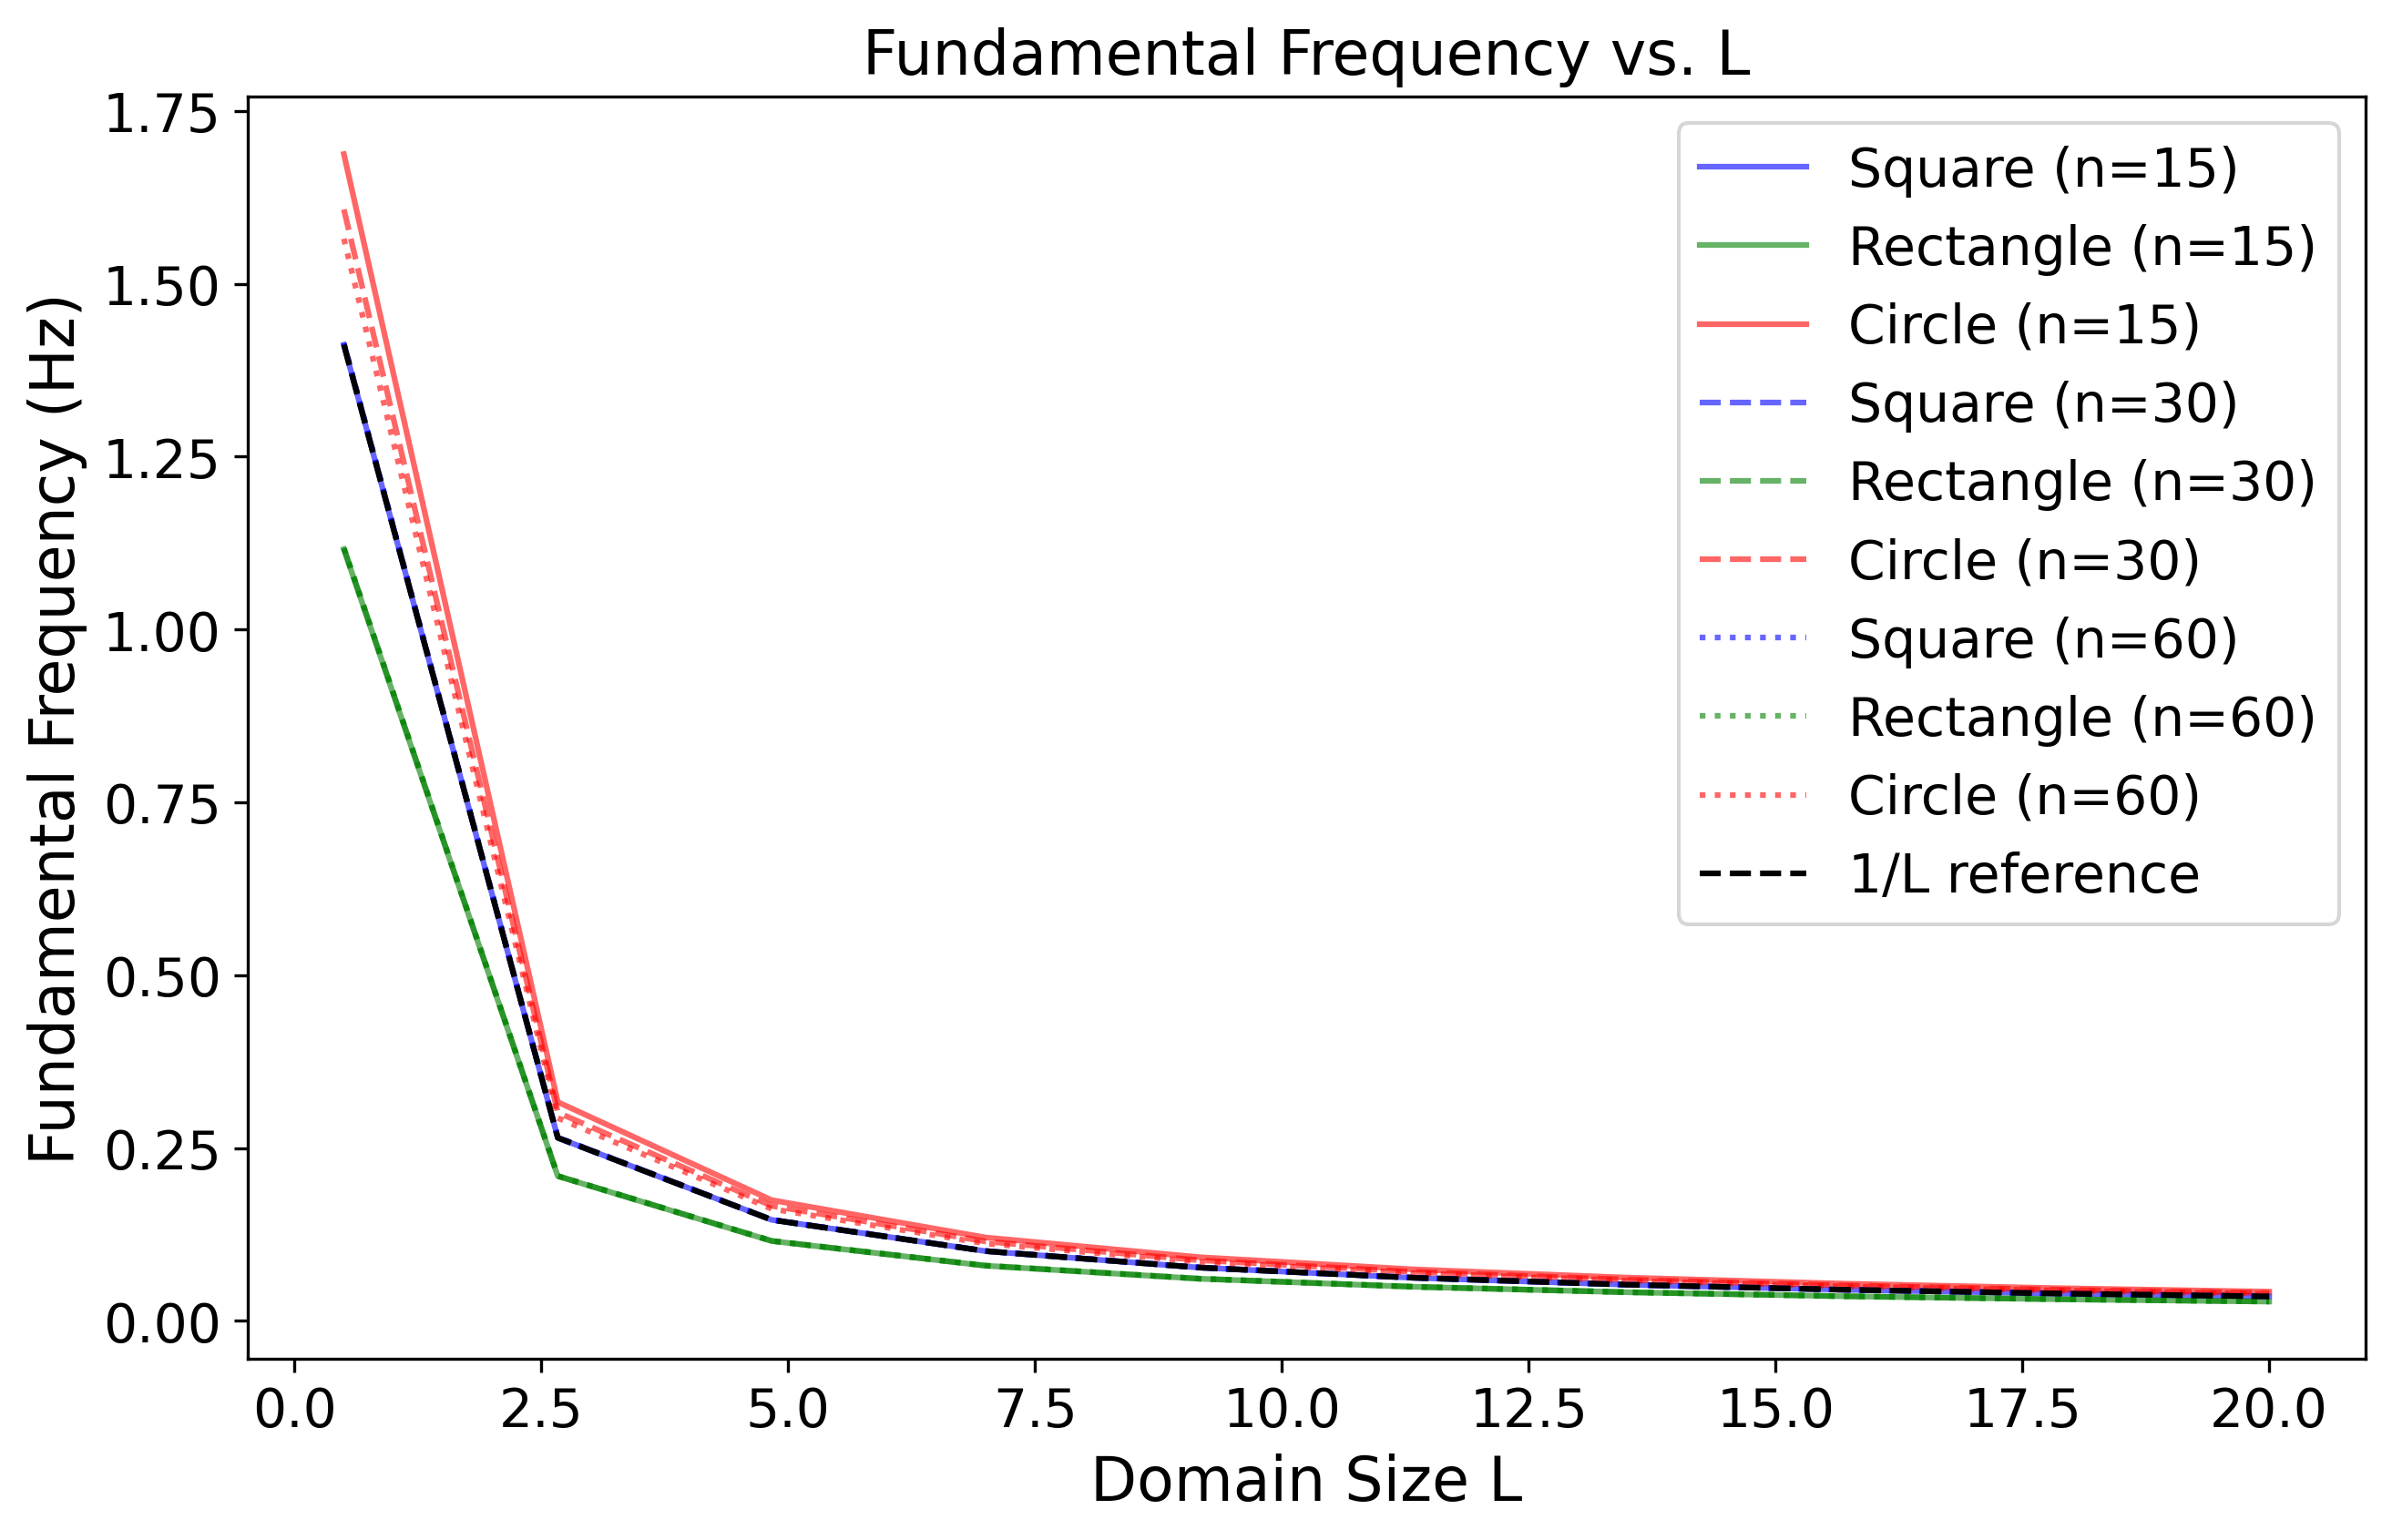

In [25]:
# Define line styles for different discretization steps (n-values)
line_styles = {15: '-', 30: '--', 60: ':'} 

# Define colors for different shapes
shape_colors = {'square': 'b', 'rectangle': 'g', 'circle': 'r'}

plt.figure(figsize=(10, 6), dpi=300)
for n in n_values:
    for shape in ['square', 'rectangle', 'circle']:
        plt.plot(
            L_values, fundamental_freqs[n][shape], 
            linestyle=line_styles[n], color=shape_colors[shape], alpha=0.6,
            label=f"{shape.capitalize()} (n={n})"
        )

# Add a reference line f = c/L
c_ref = fundamental_freqs[n_values[0]]['square'][0] * L_values[0] 
plt.plot(L_values, c_ref / L_values, '--k', label='1/L reference')
plt.xlabel('Domain Size L', fontsize=16)
plt.ylabel('Fundamental Frequency (Hz)', fontsize=16)
plt.title('Fundamental Frequency vs. L', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.savefig('results/membrane_eigenmodes/frequency_vs_L.png')
plt.show()

#### **E**: Time-dependent solutions

Solver: eig, Time taken: 0.3485 s, First eigenvalue: 19.7223+0.0000j
Animation successfully saved as results/membrane_eigenmodes/square.gif
Solver: eig, Time taken: 0.3991 s, First eigenvalue: 12.3265+0.0000j
Animation successfully saved as results/membrane_eigenmodes/rectangle.gif


c:\Users\Saloc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\sparse\_index.py:197: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil and dok are more efficient.
  self._set_arrayXarray(i, j, x)


Solver: eig, Time taken: 0.2389 s, First eigenvalue: 25.5102+0.0000j
Animation successfully saved as results/membrane_eigenmodes/circle.gif


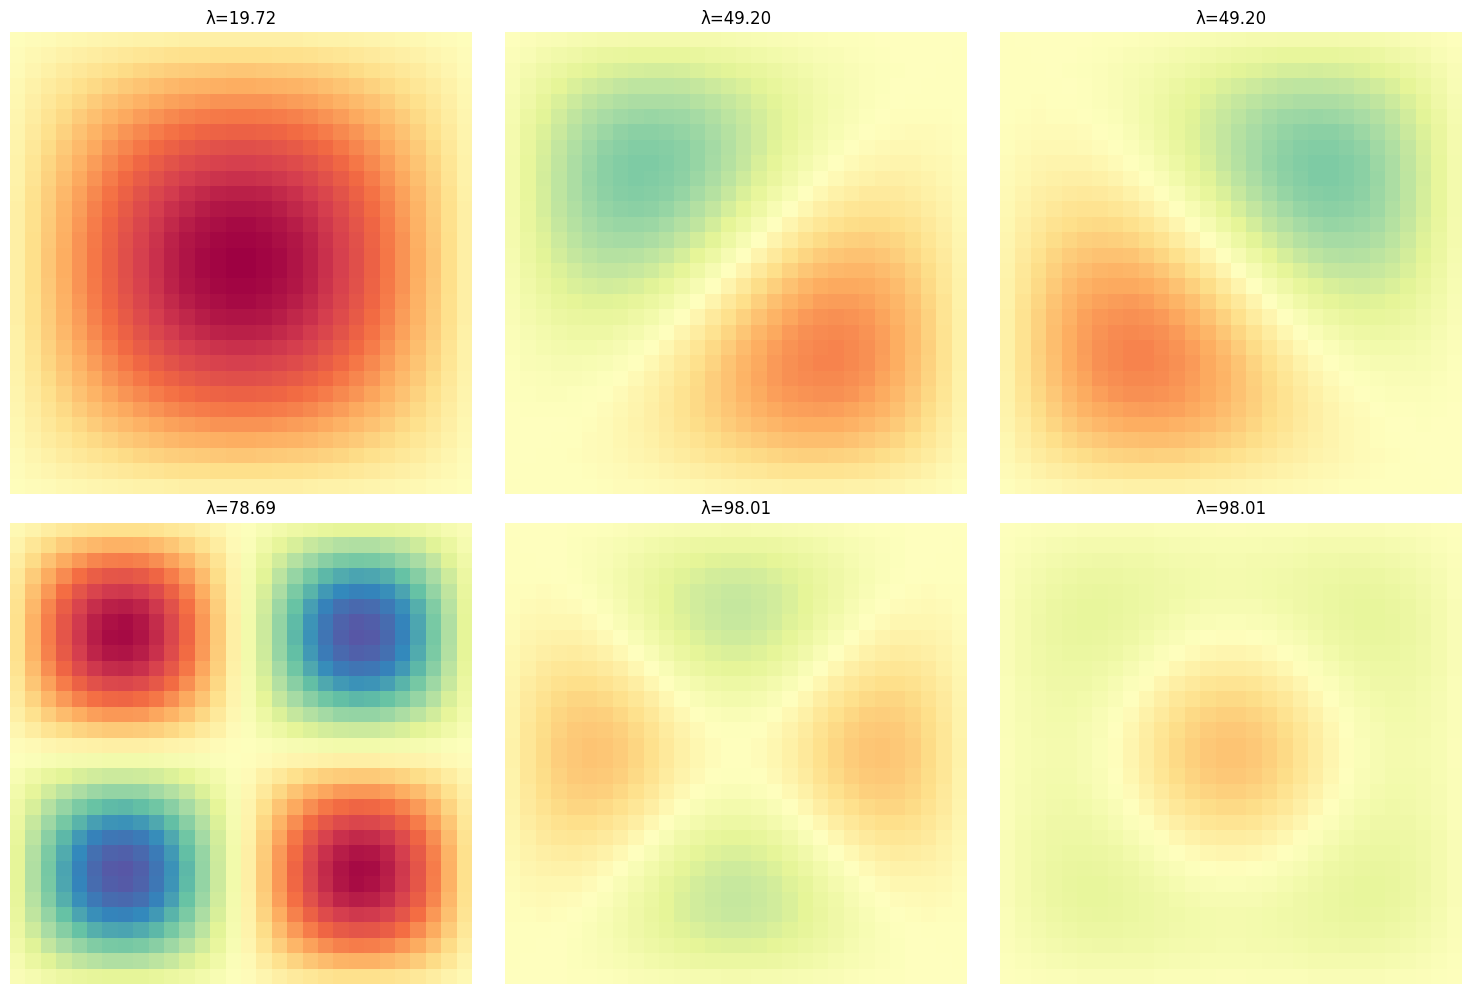

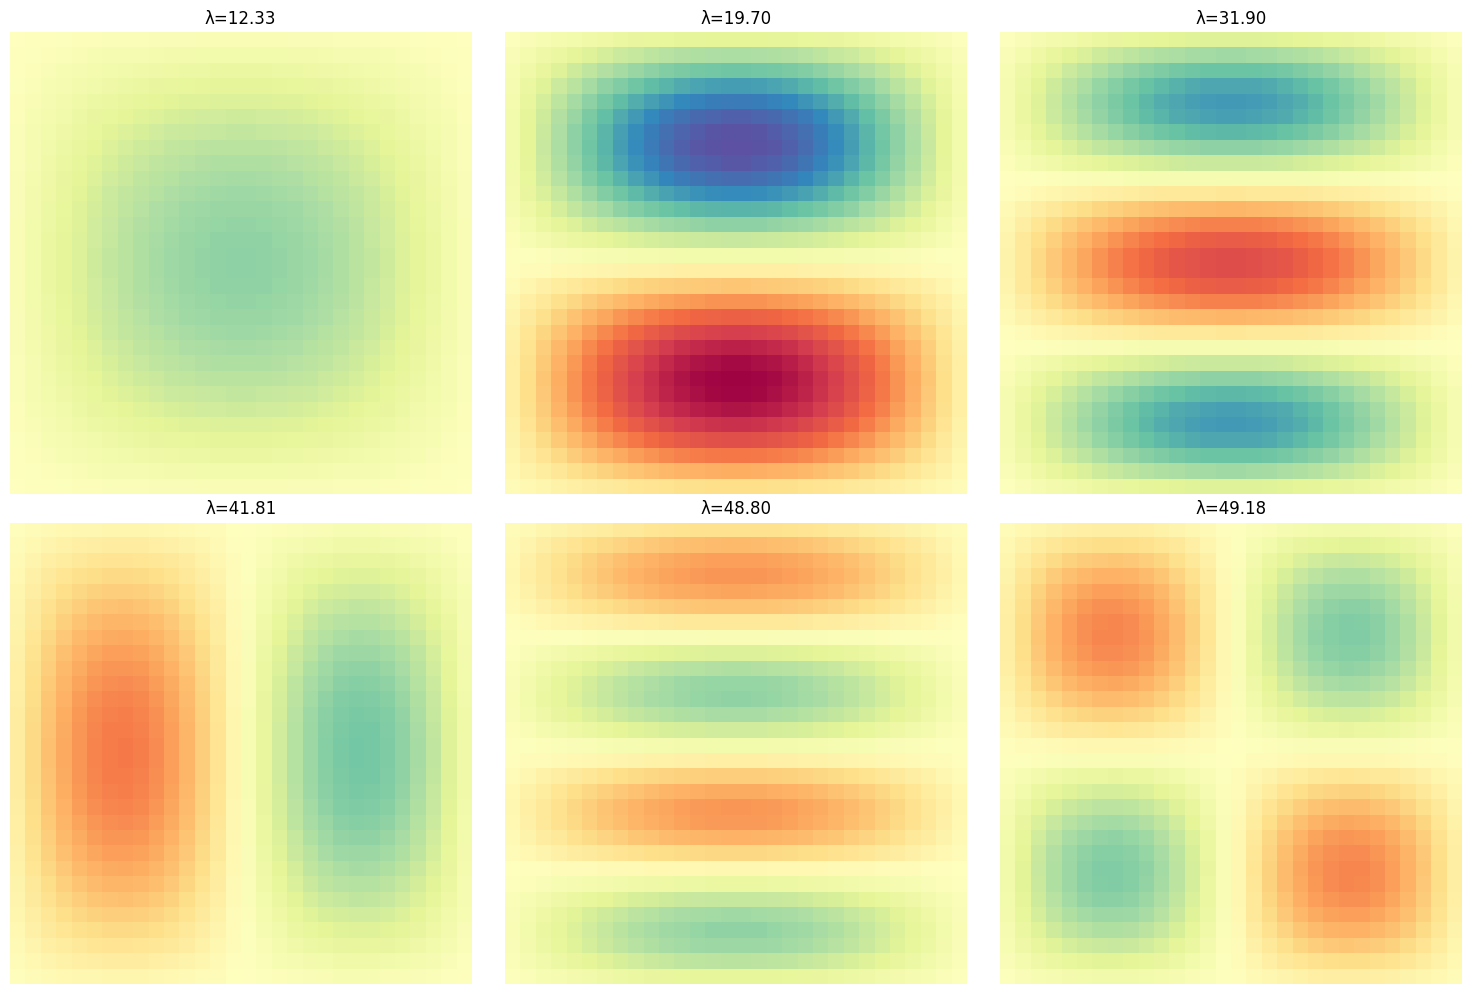

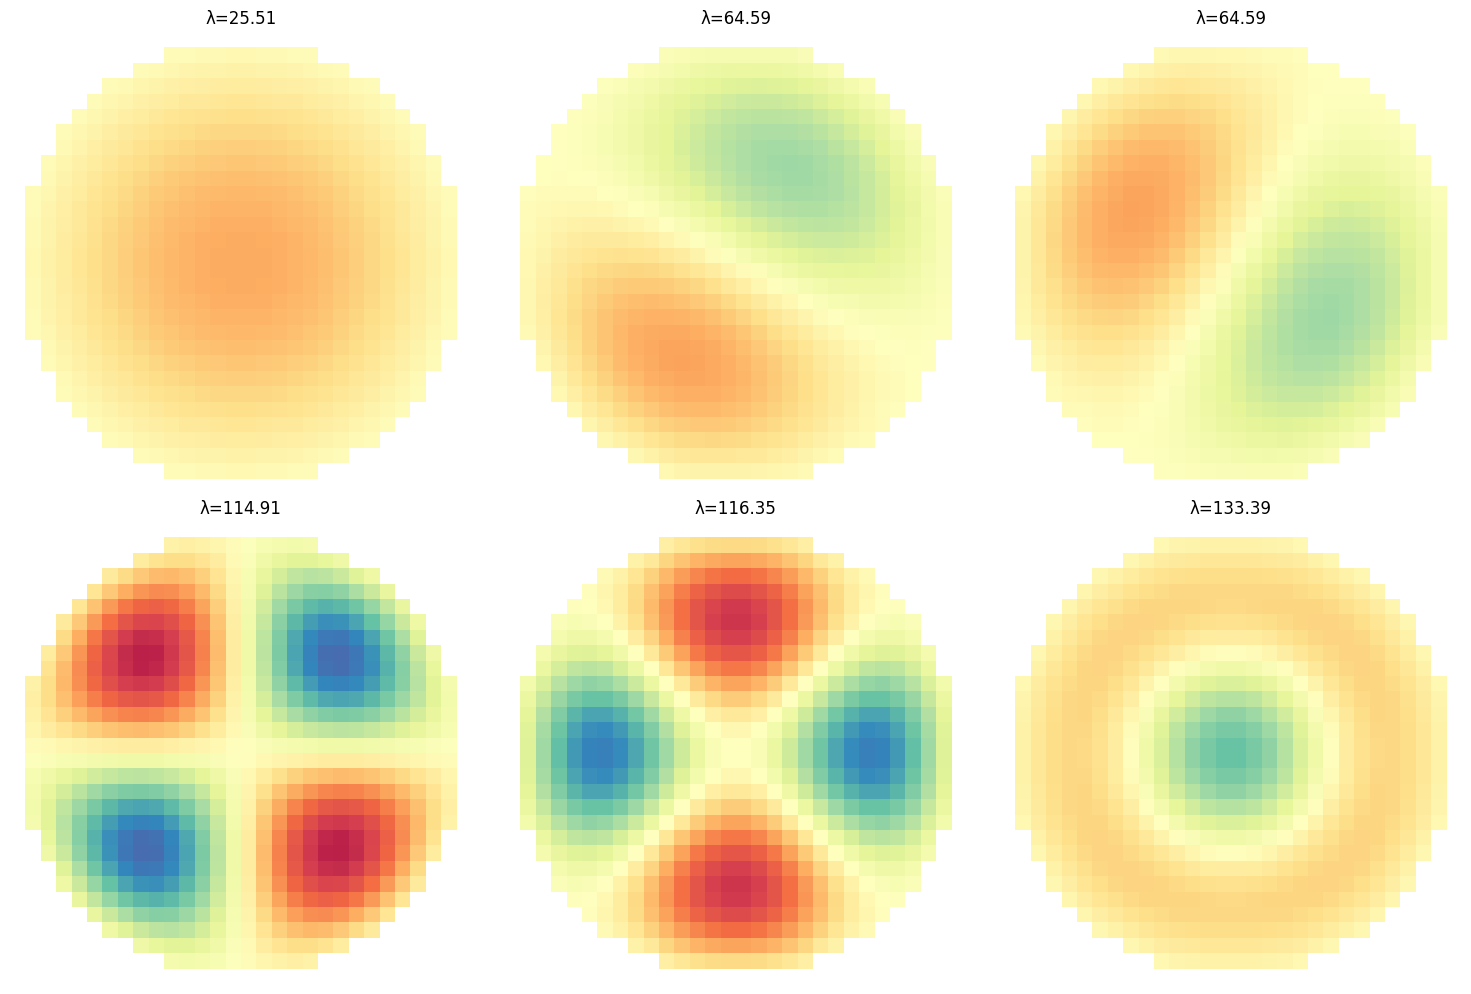

In [26]:
for shape, dims in shape_dims_tuple:
    problem = EigenvalueProblem(shape, dims)
    eigenvalues, eigenvectors, _ = problem.solve_eigen_problem(solver='eig')
    problem.animate_eigenmodes(save_as=shape)

## **3.2**: Direct Methods for Steady State Problems

In [5]:
import src.direct_steady_state
reload(src.direct_steady_state)
from src.direct_steady_state import *

Max steps reached without convergence.


### **G**: Plotting the Steady-State Diffusion

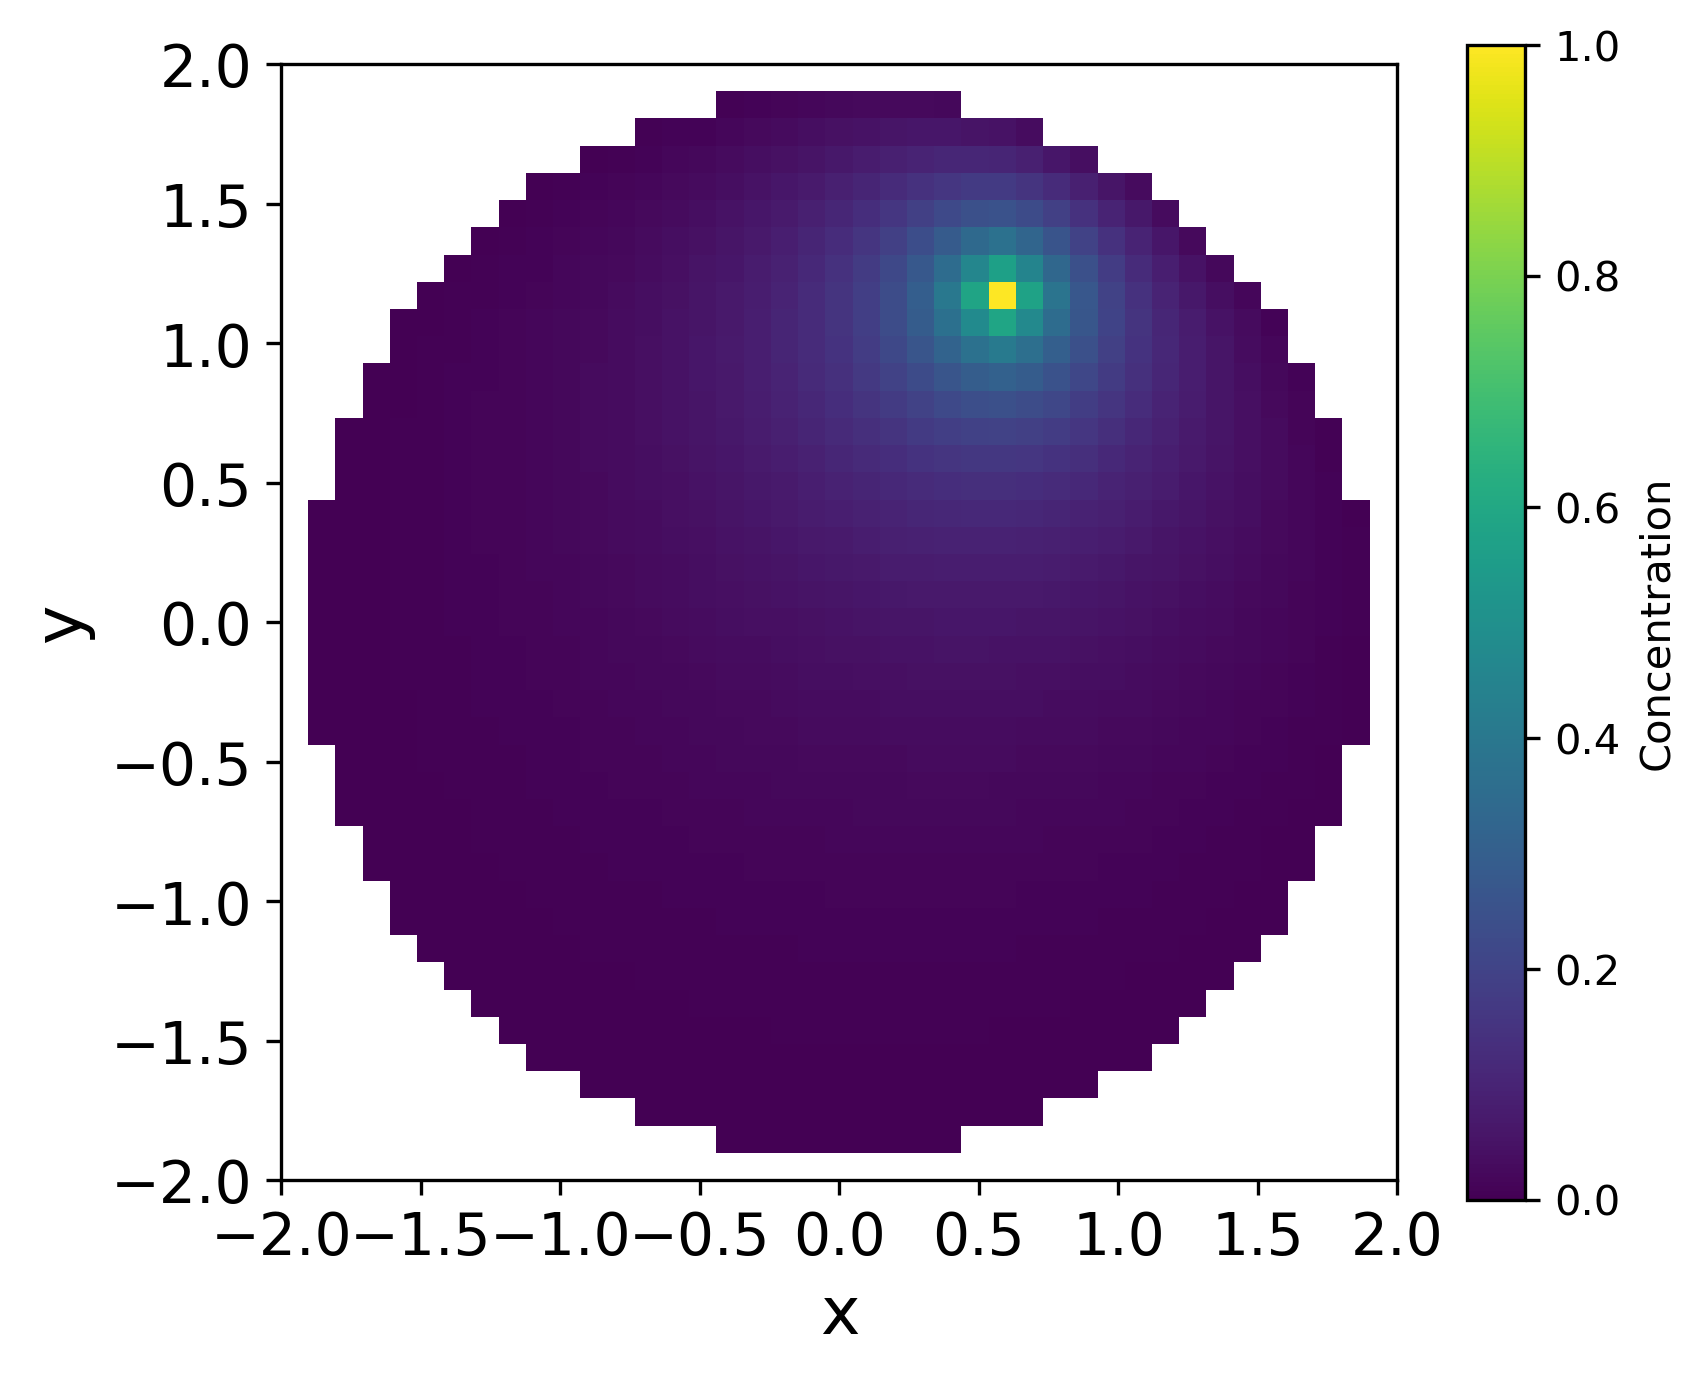

In [ ]:
plot_steady_state_concentration(savefig=False)

## **3.3**: Leapfrog Integration

In [27]:
import src.leapfrog
reload(src.leapfrog)
from src.leapfrog import Leapfrog

### **I**: Leapfrog Integration for the Simple Harmonic Oscillator

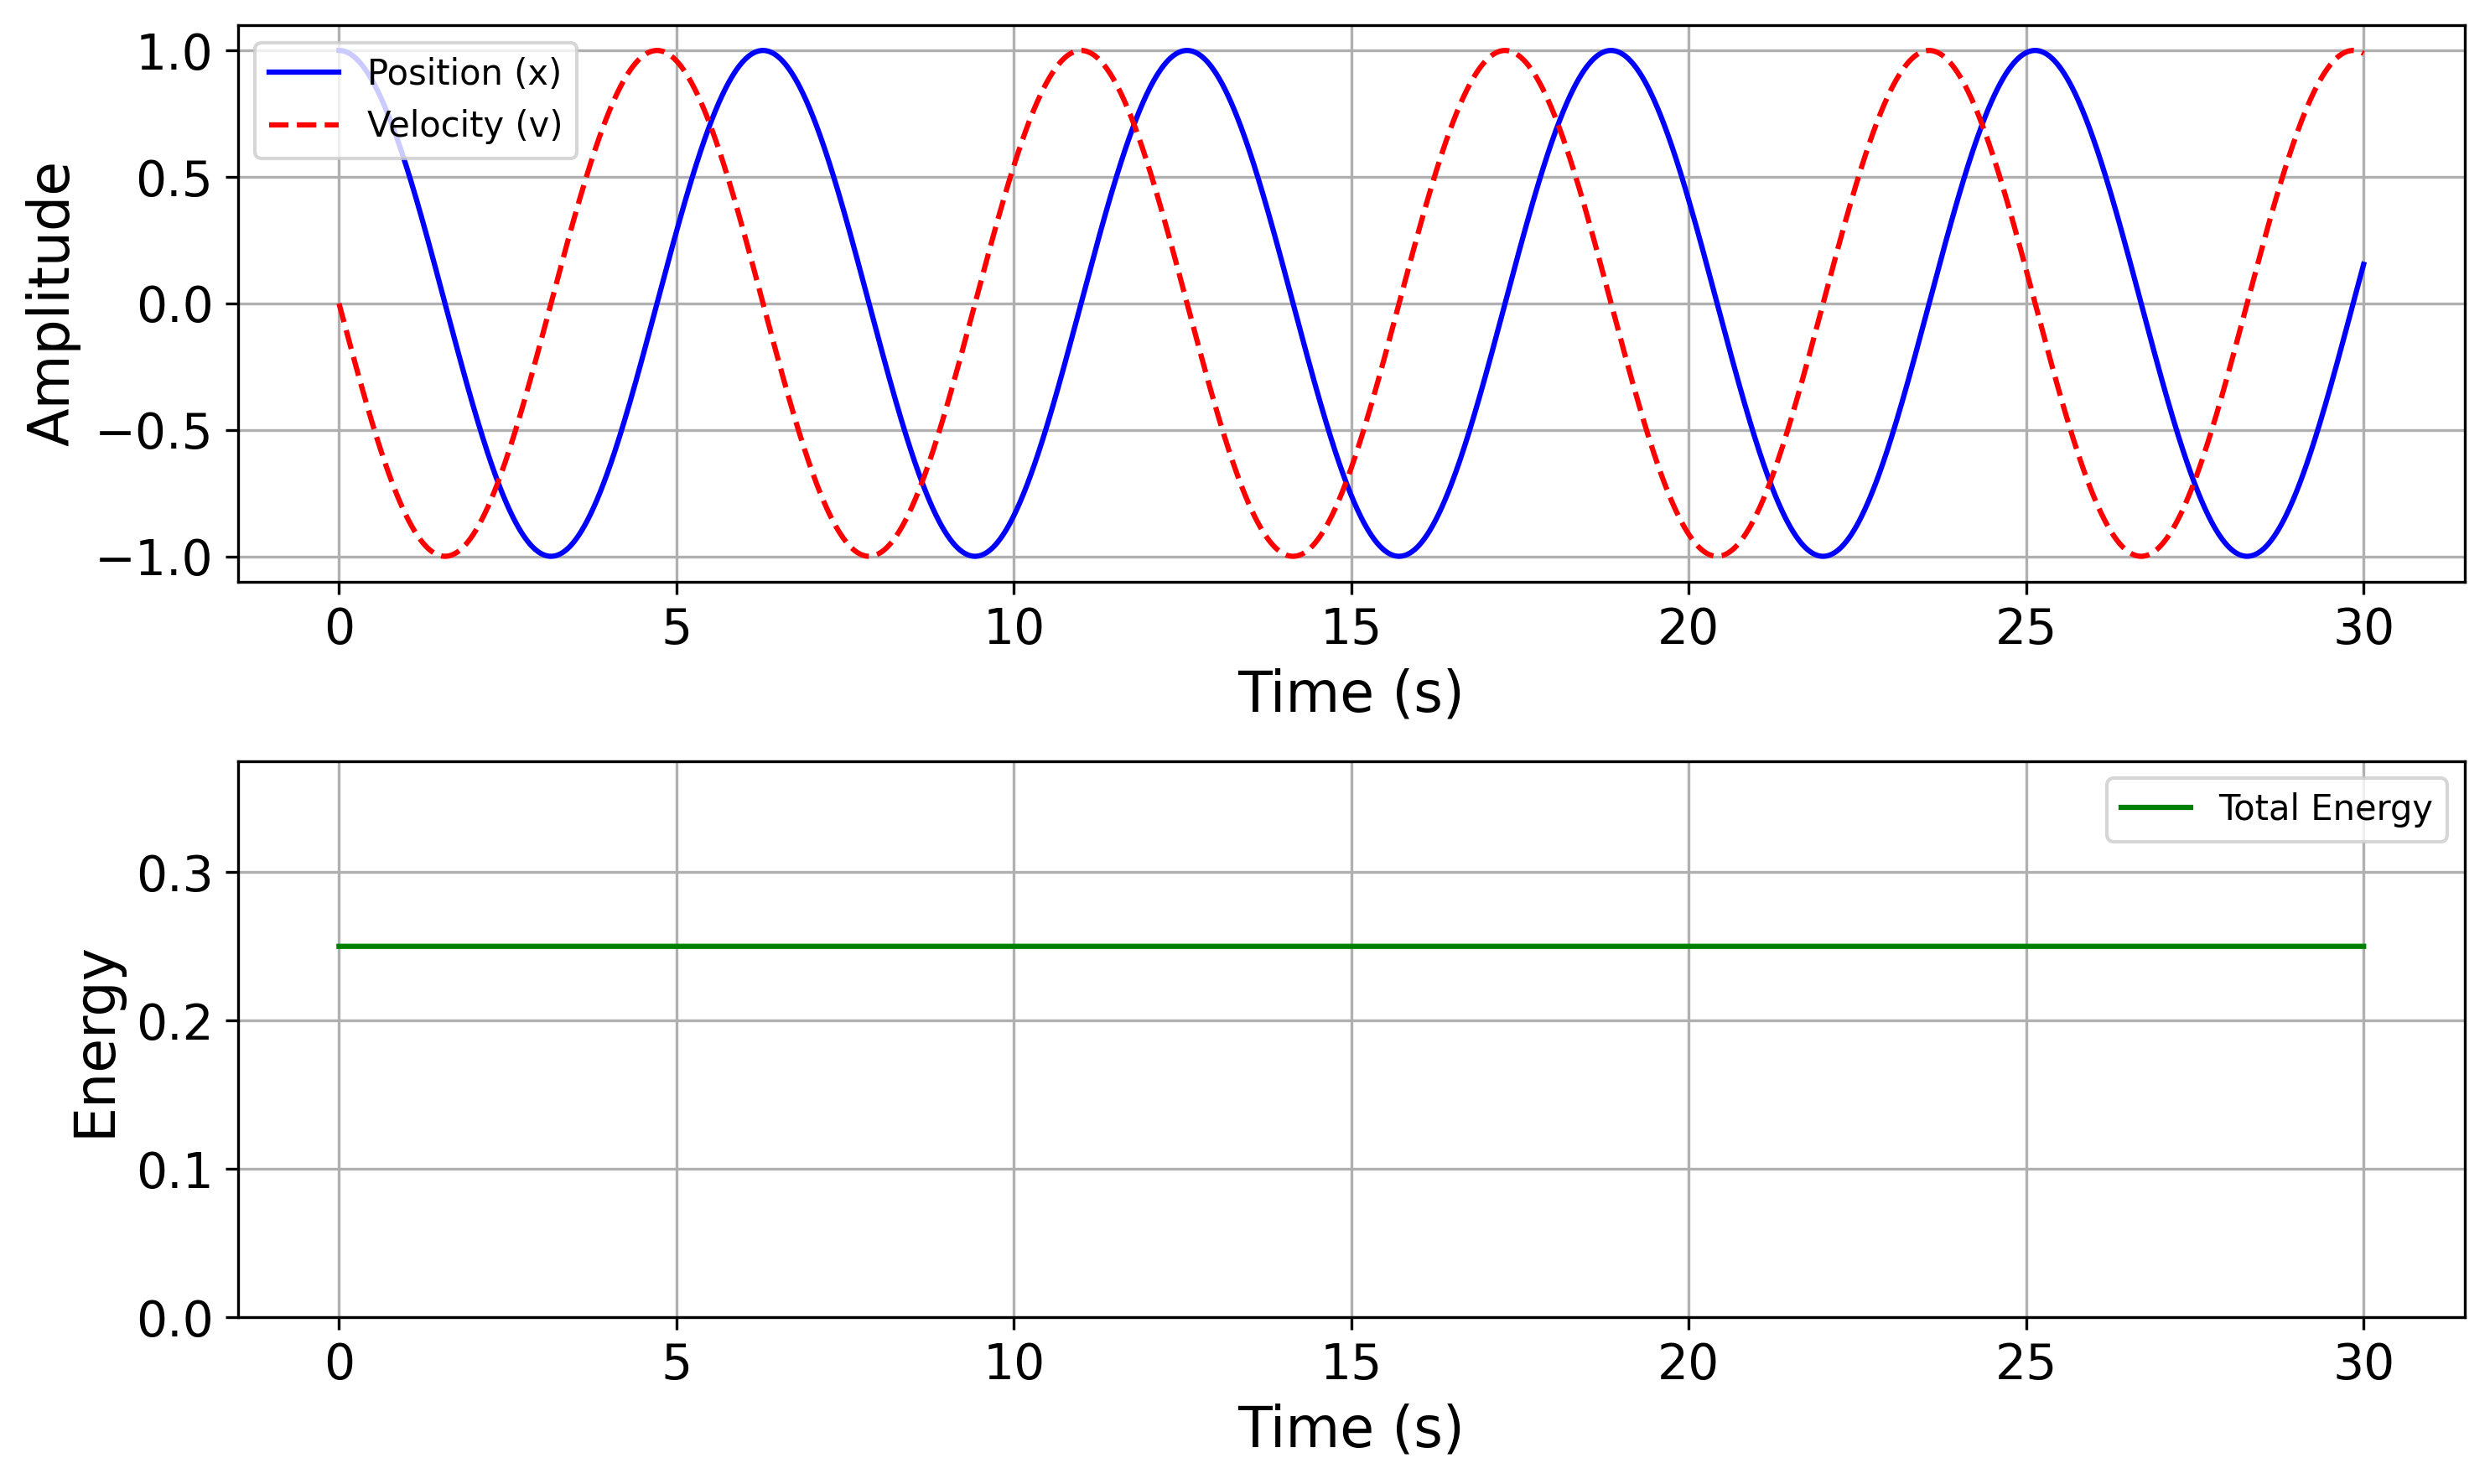

In [28]:
solver = Leapfrog(T=30)
solver.solve_leapfrog()
solver.plot_results_leapfrog(savefig=True)

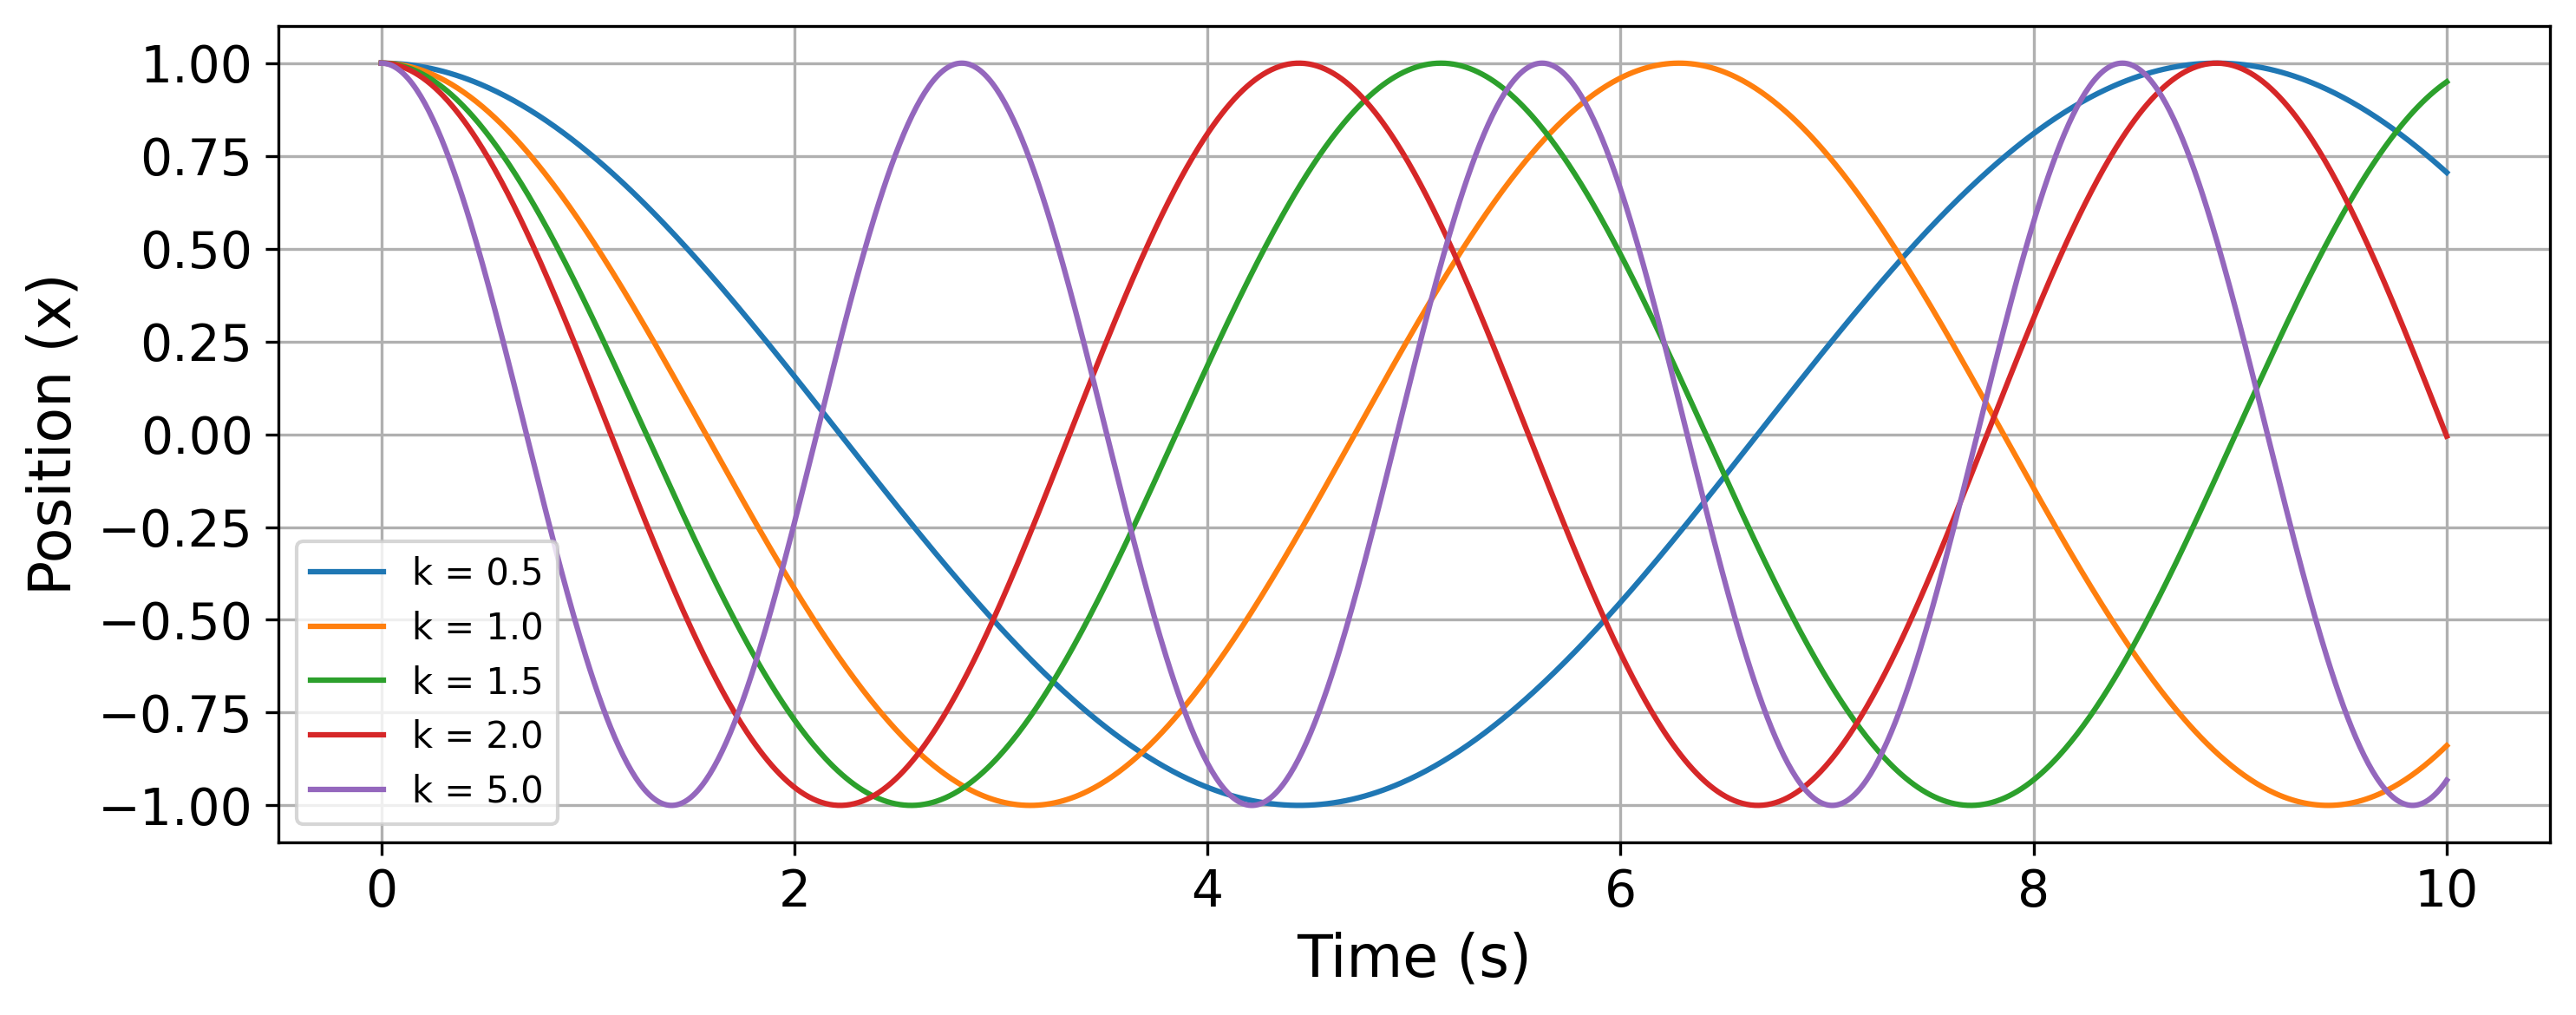

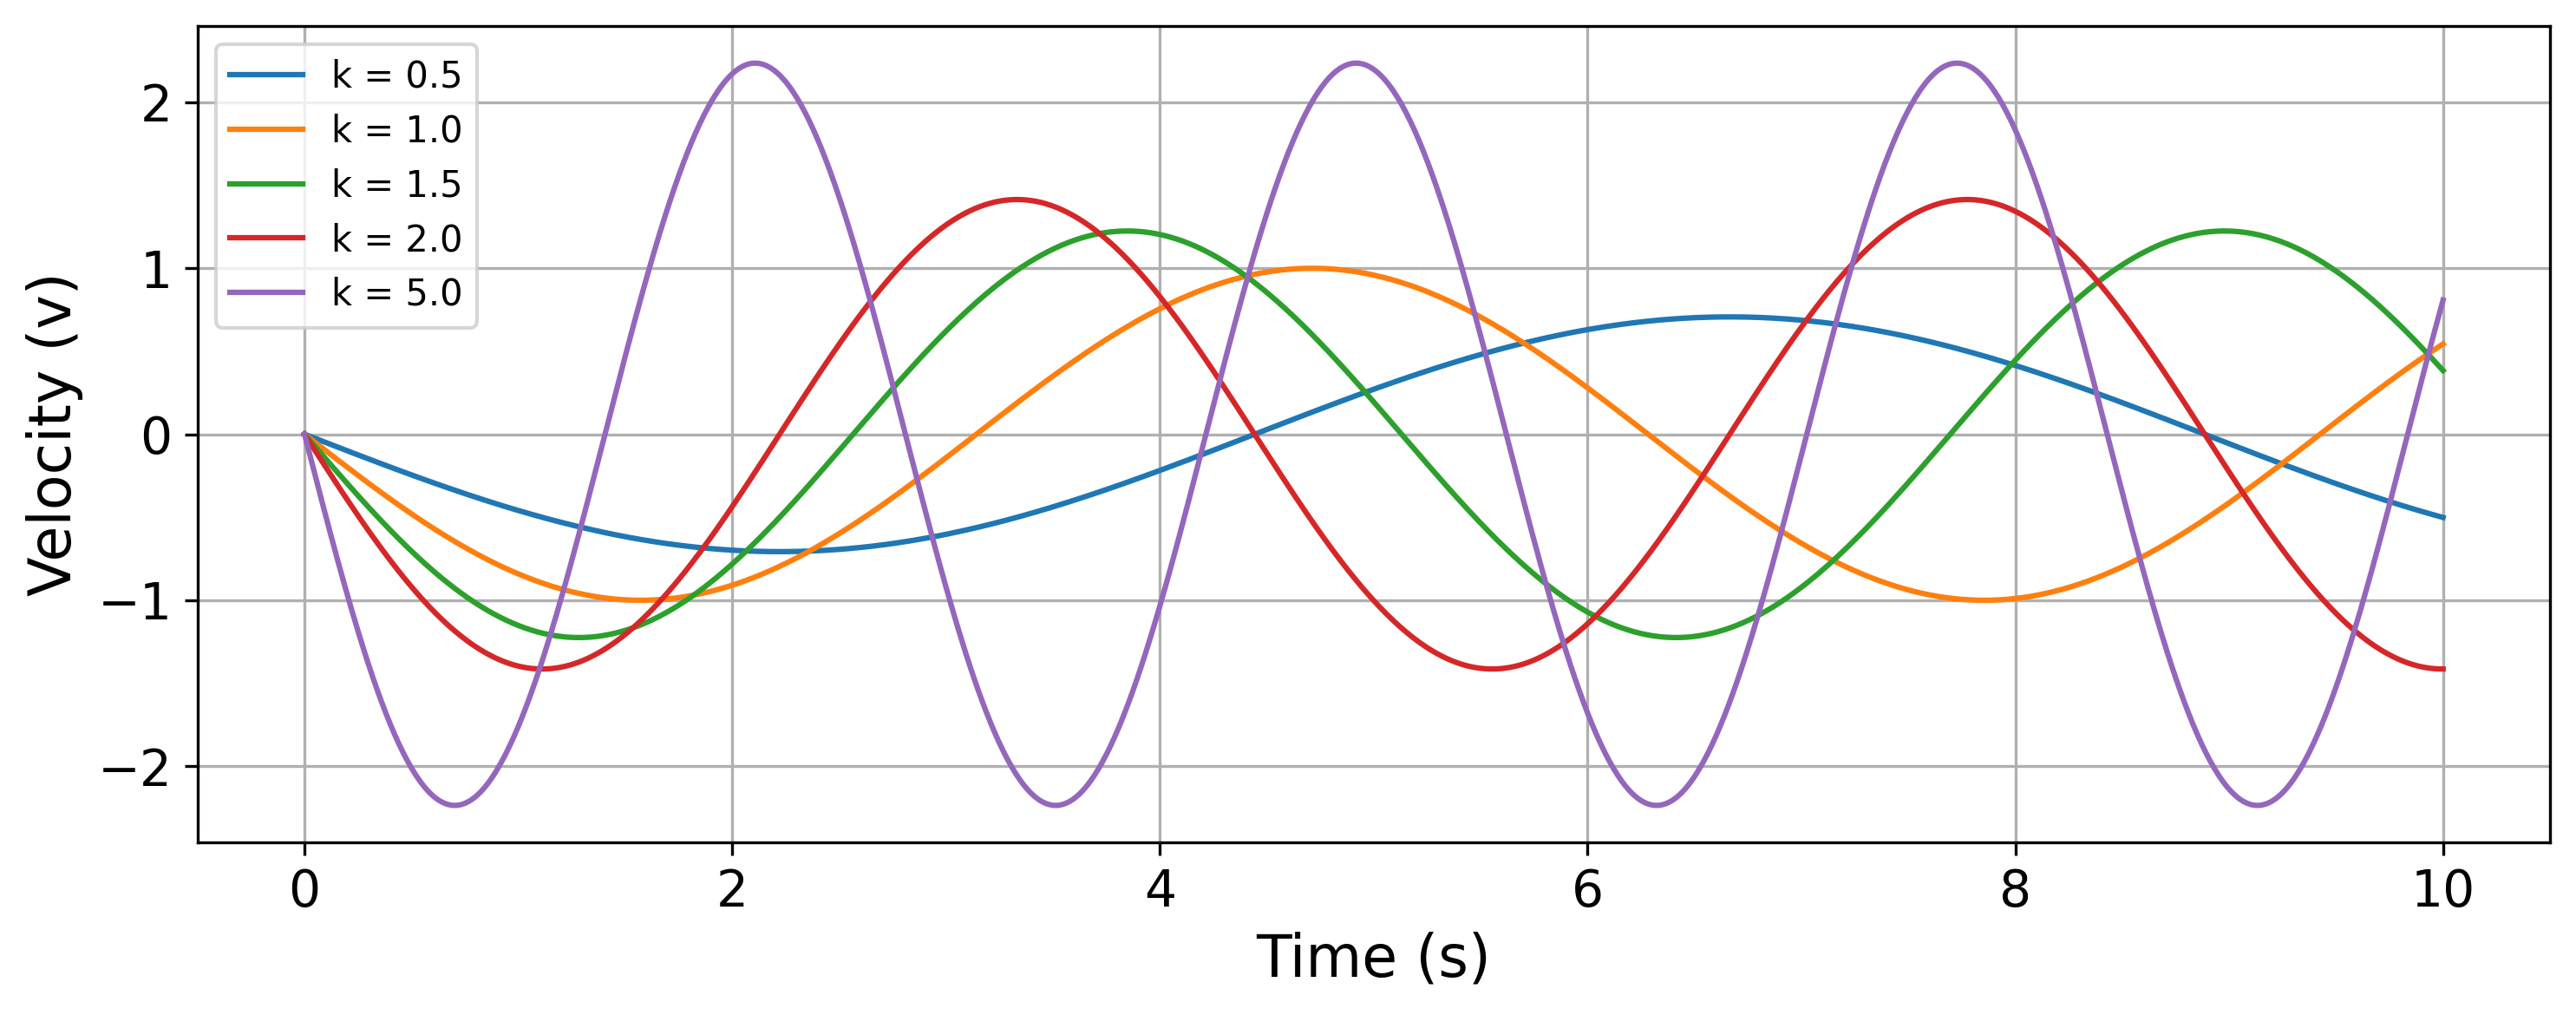

In [29]:
k_values = [0.5, 1.0, 1.5, 2.0, 5.0]

solver_many_k = Leapfrog(T=10)
solver_many_k.solve_leapfrog()

# Plot many positions graphs
solver_many_k.plot_position_many_k(k_values, savefig=True)

# Plot many velocities graphs
solver_many_k.plot_velocity_many_k(k_values, savefig=True)

### ***Bonus***: Leapfrog vs. Runge-Kutta (Energy Conservation Comparison)

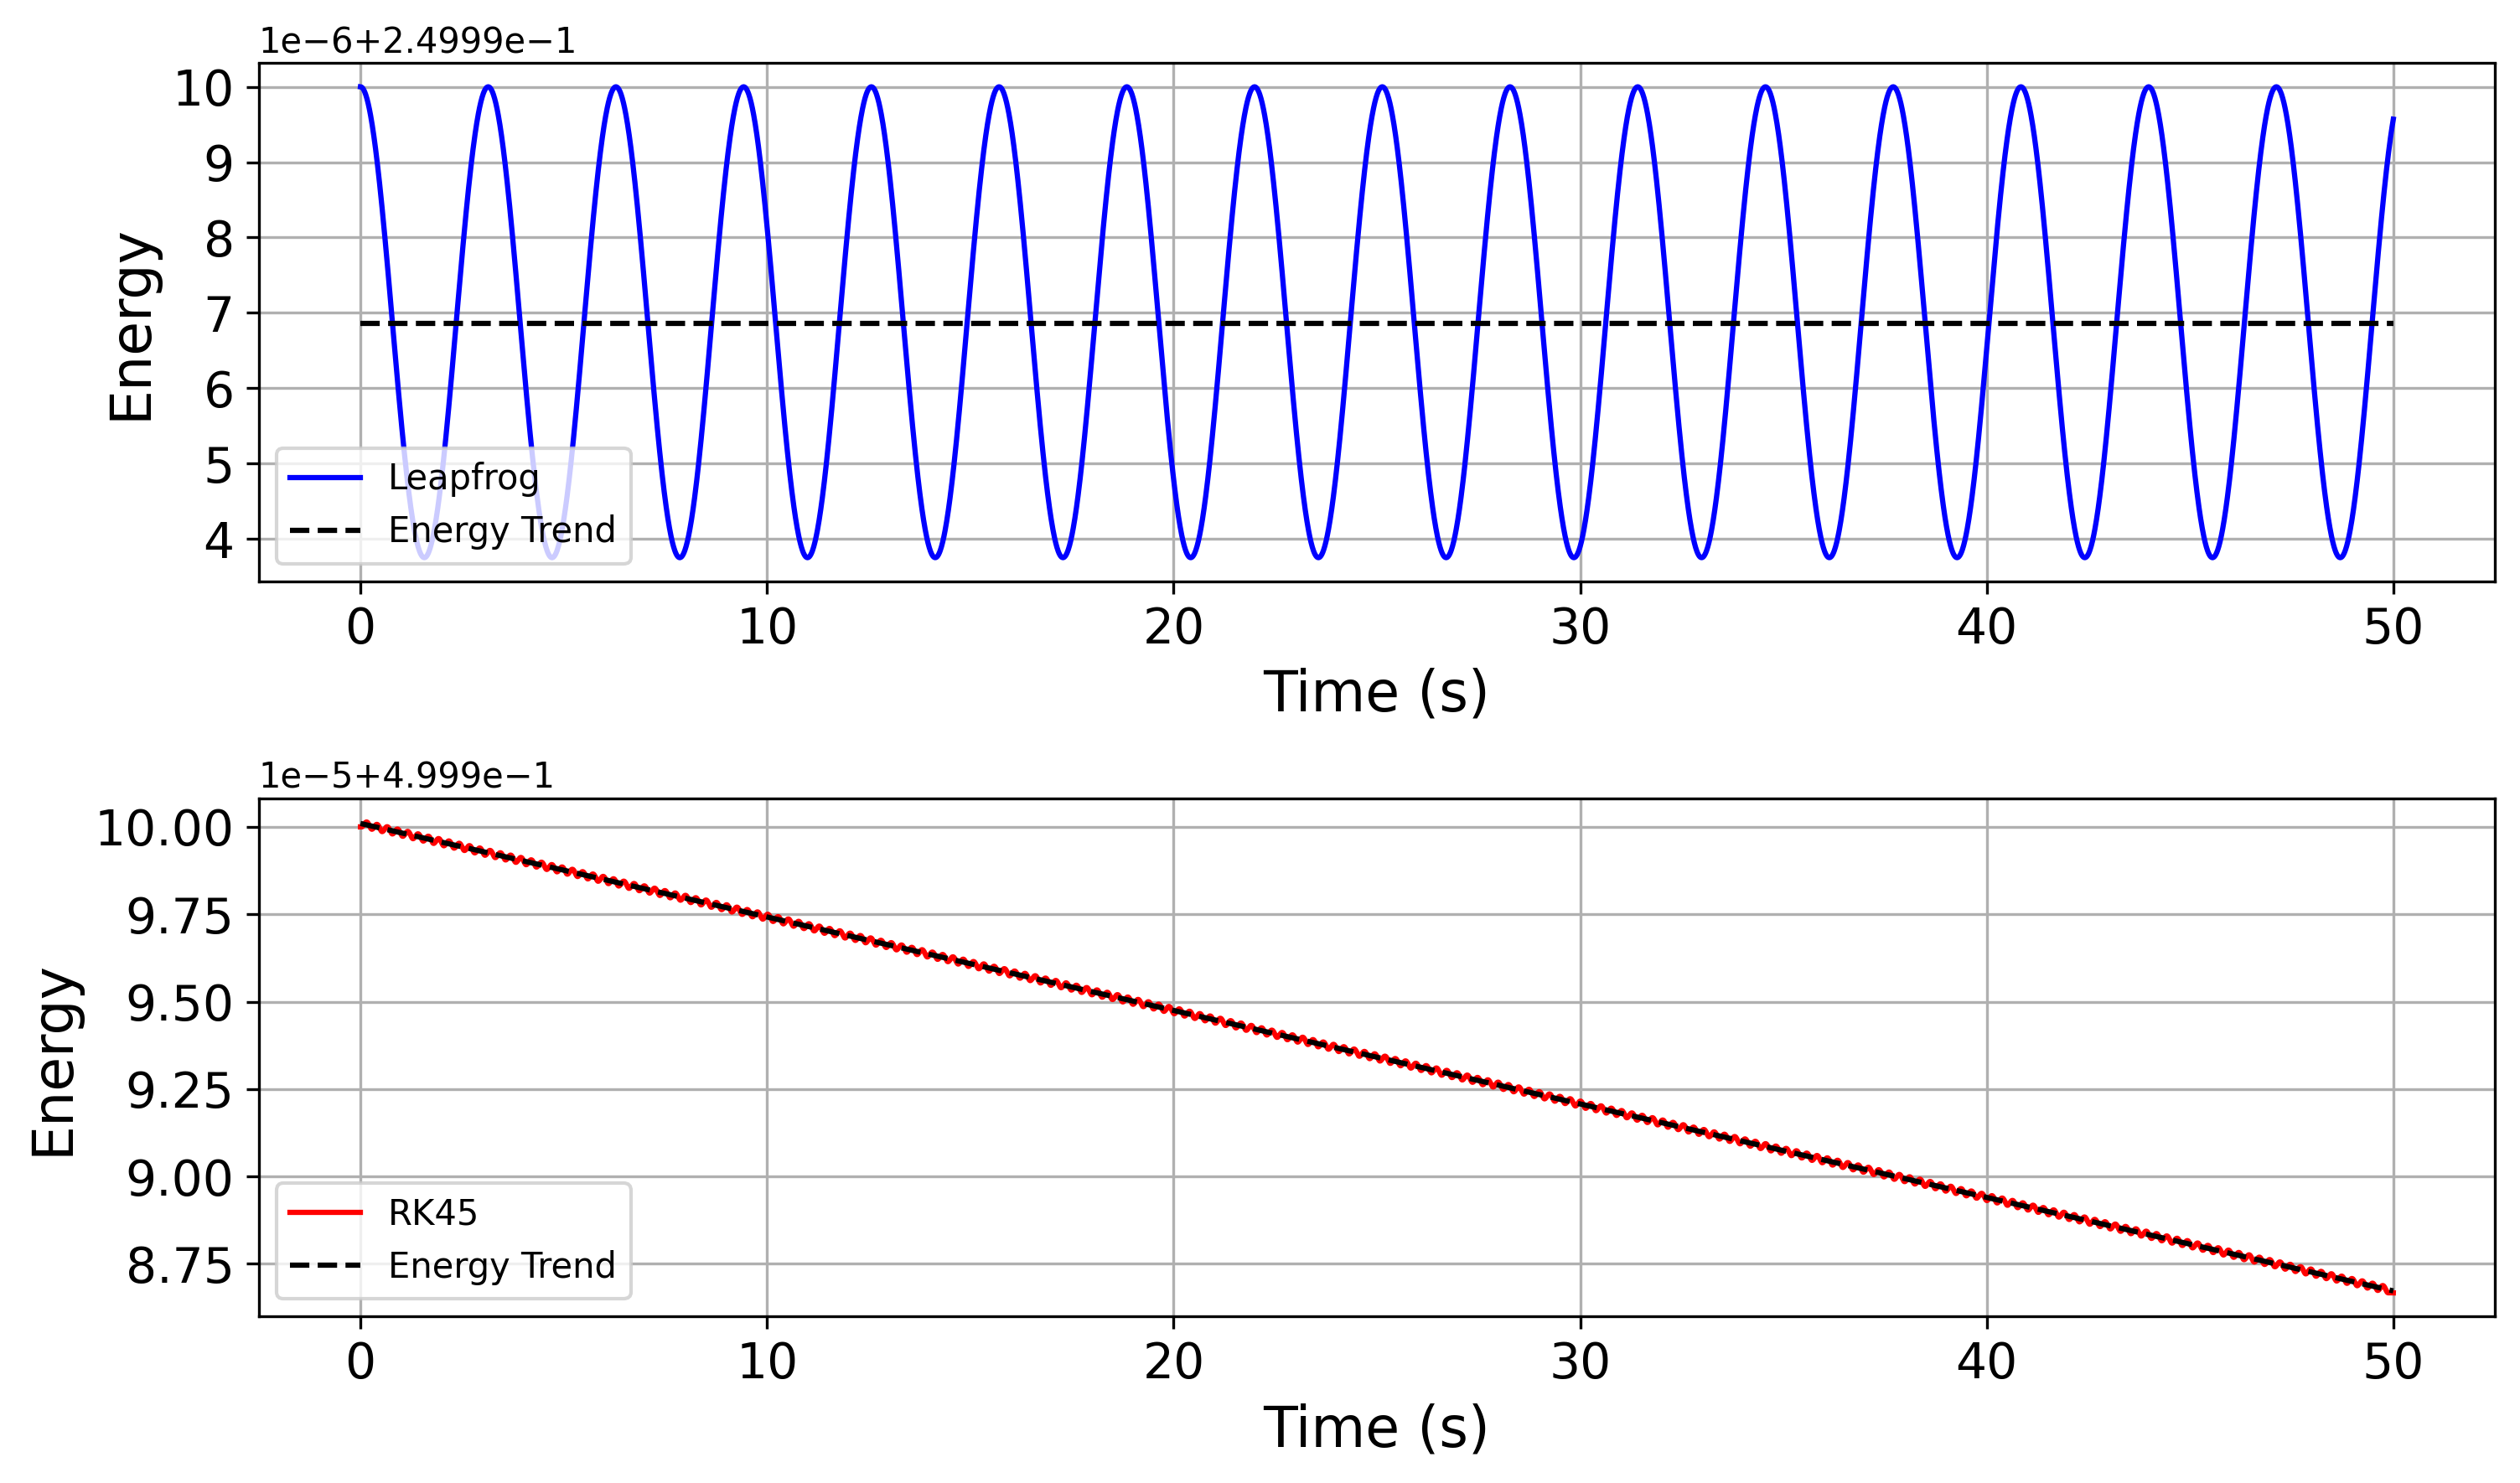

In [30]:
solver_compare = Leapfrog(T=50, dt=0.01)
solver_compare.plot_compare_methods(savefig=True)

### **J**: Sinusoidal Forcing of Harmonic Oscillator

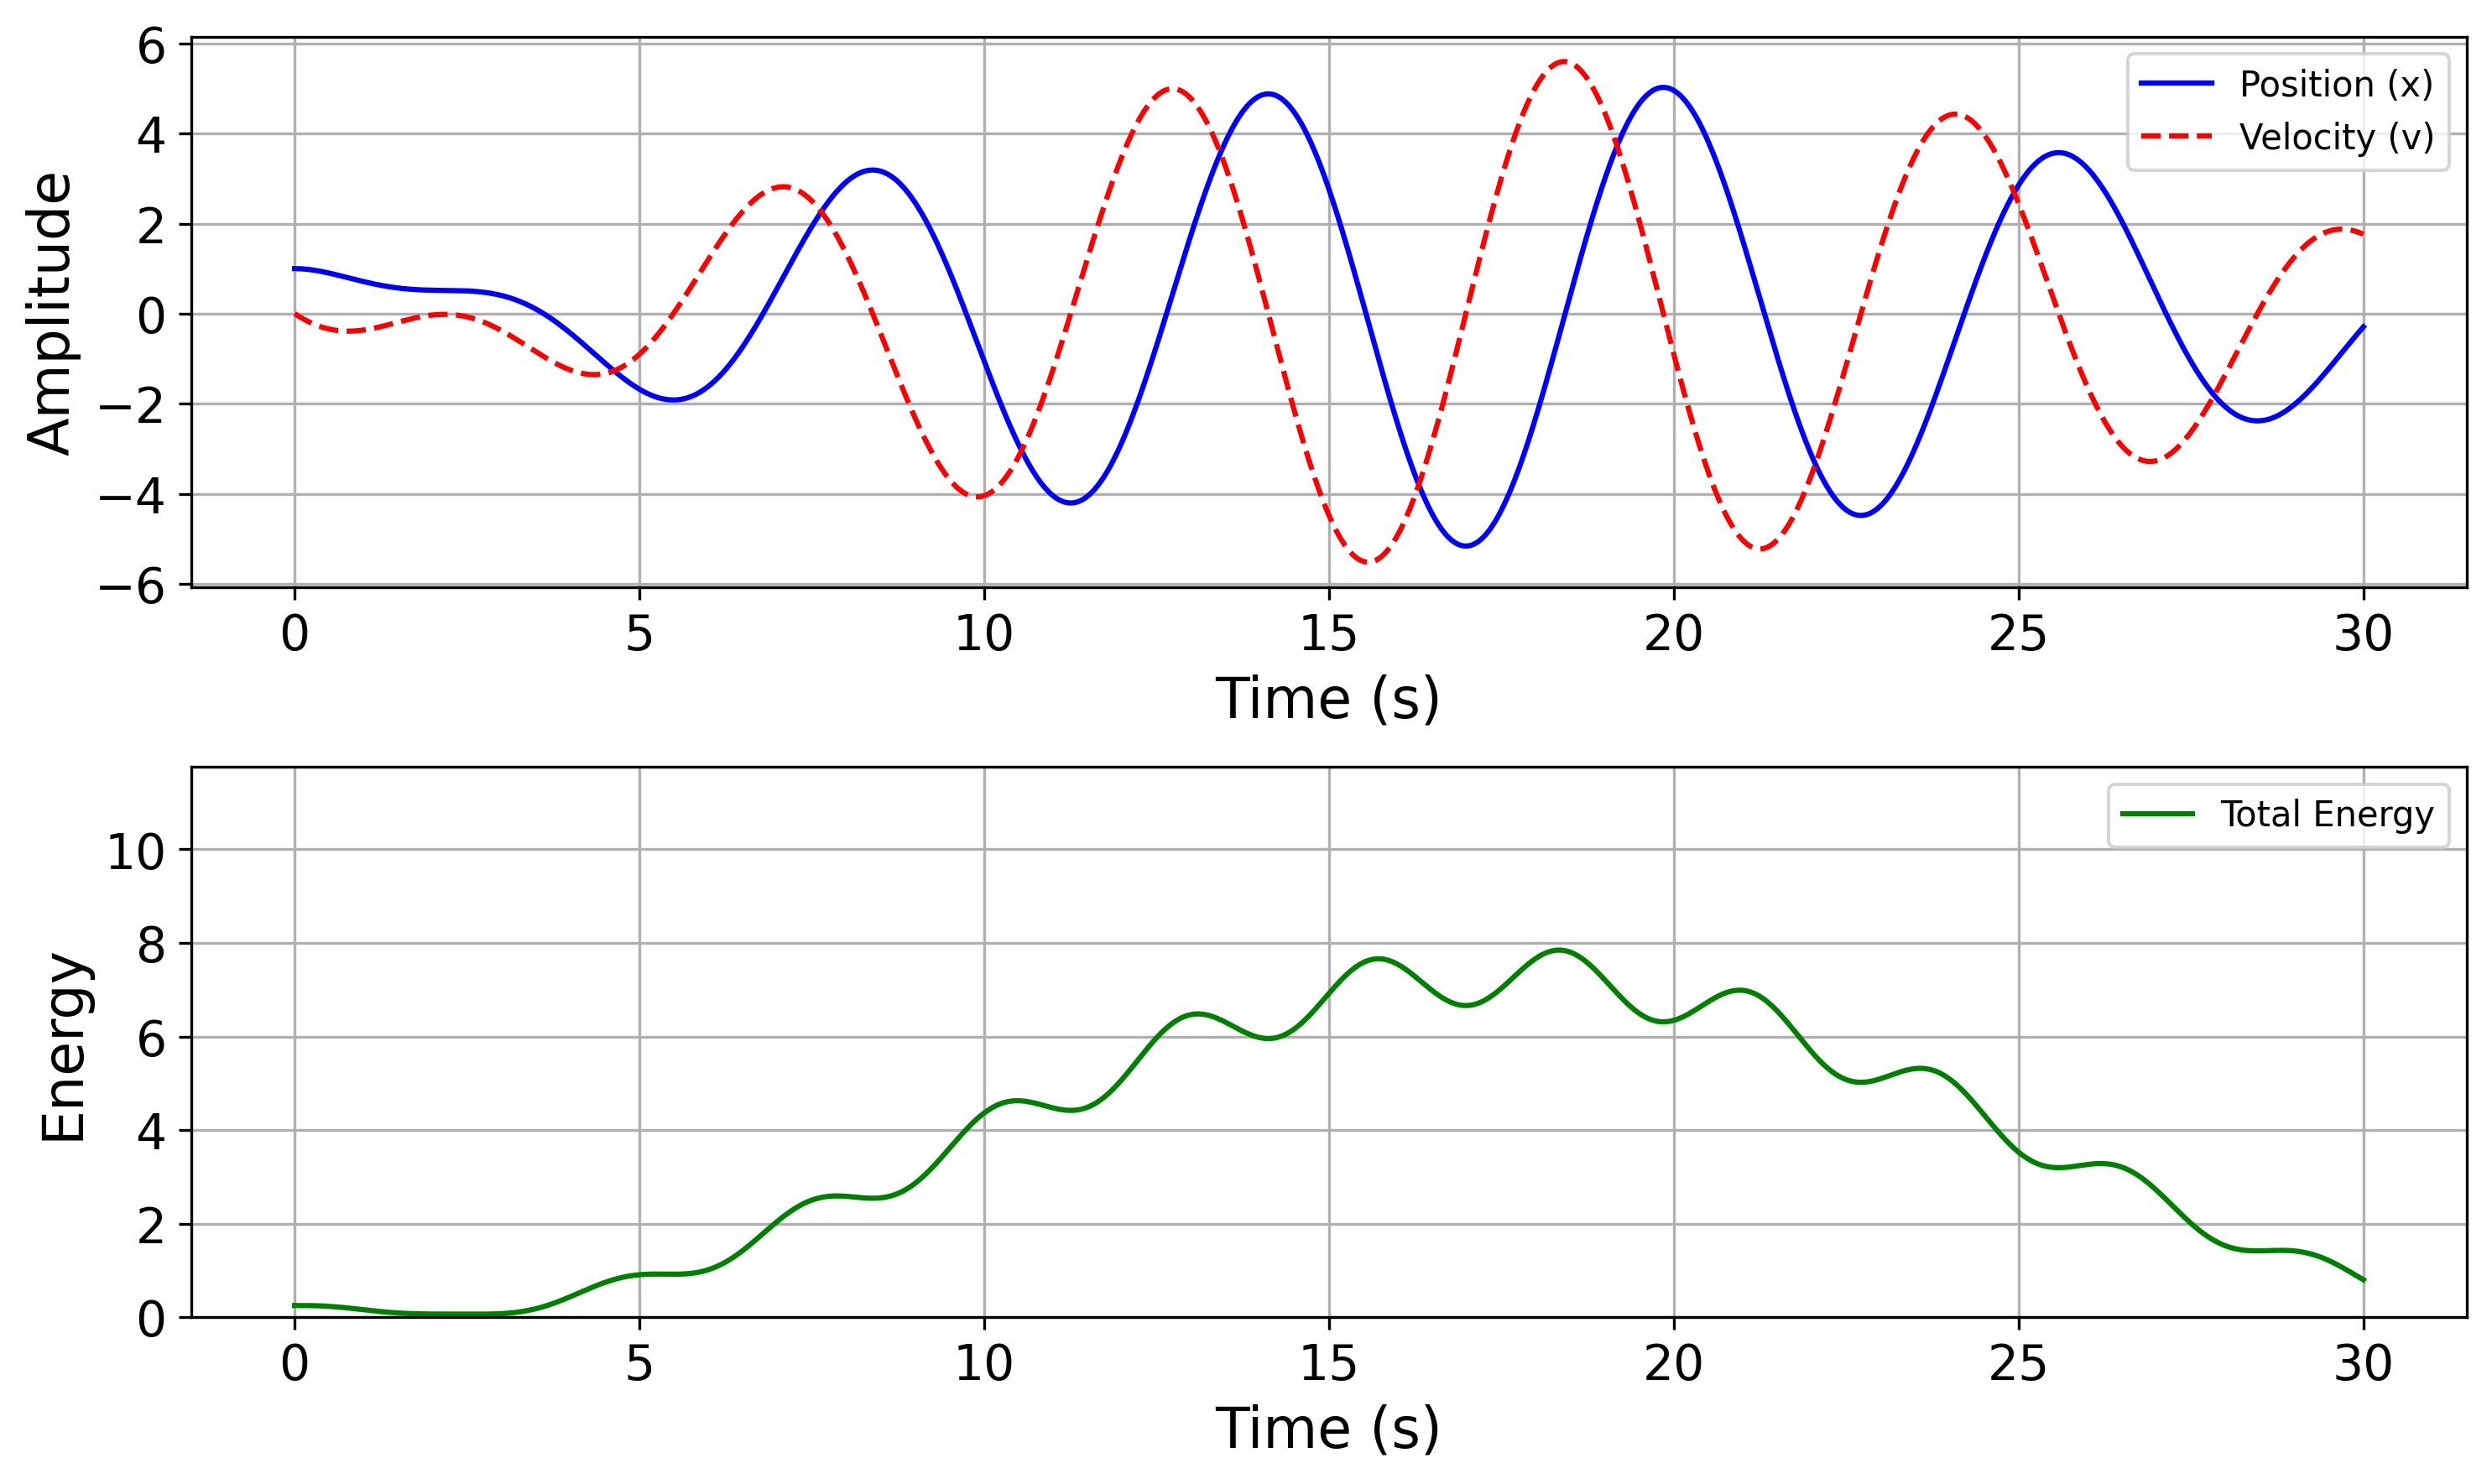

In [31]:
solver_forcing = Leapfrog(T=30)

omega_value = 1.2

solver_forcing.solve_leapfrog_with_forcing(omega=omega_value)
solver_forcing.plot_results_leapfrog(savefig=True, with_forcing=True, omega=omega_value)

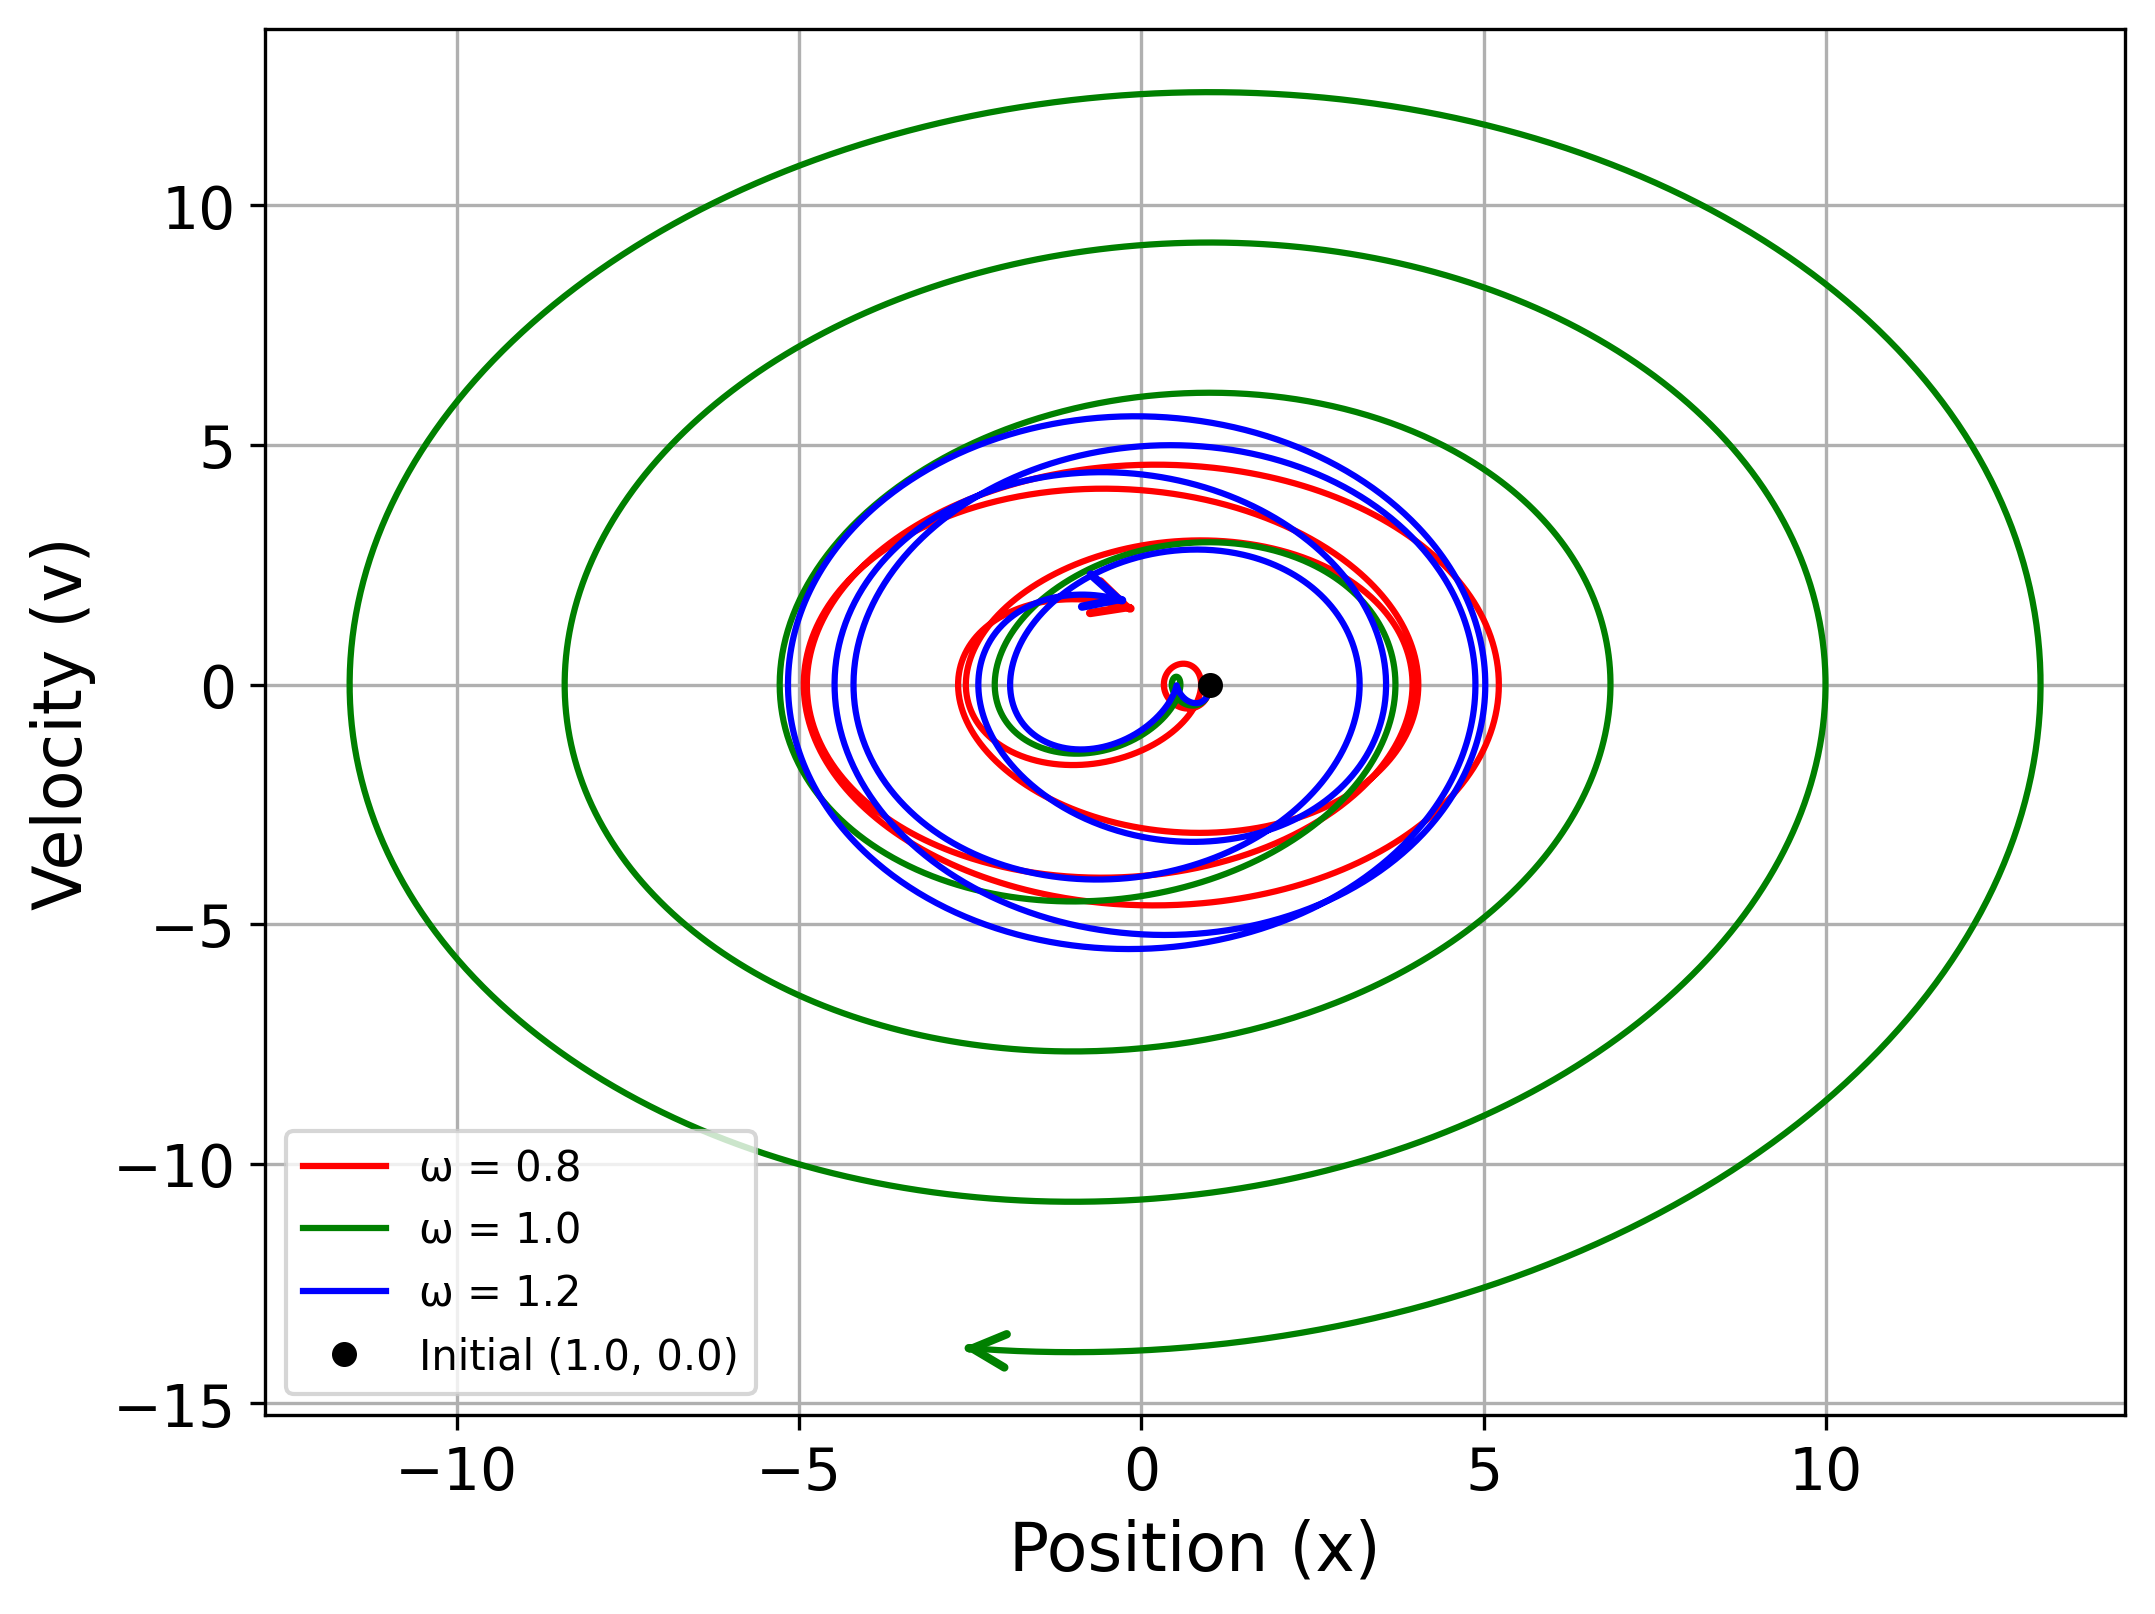

In [32]:
solver_forcing.plot_phase_space(savefig=True)